In [1]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

# Data

In [2]:
# CAD asset prices and returns 
CAD = pd.read_csv('df_cad_asset.csv',index_col=0) 
CAD

,XSP.TO_P,XSP.TO_R,XIU.TO_P,XIU.TO_R,XIN.TO_P,XIN.TO_R,XBB.TO_P,XBB.TO_R,XGB.TO_P,XGB.TO_R,XRB.TO_P,XRB.TO_R,XRE.TO_P,XRE.TO_R
DATE,,,,,,,,,,,,,,
2006-04-01,13.145290,NaN,11.521857,NaN,17.995522,NaN,16.917009,NaN,NaN,NaN,14.437650,NaN,6.142775,NaN
2006-05-01,12.707119,-0.033333,11.153104,-0.032005,16.989994,-0.055877,16.982298,0.003859,NaN,NaN,14.296542,-0.009774,6.151716,0.001456
2006-06-01,12.794751,0.006896,11.037451,-0.010370,17.191097,0.011837,16.697371,-0.016778,NaN,NaN,14.051461,-0.017143,6.120422,-0.005087
2006-07-01,12.810687,0.001246,11.291711,0.023036,17.232704,0.002420,17.248827,0.033027,NaN,NaN,14.674636,0.044349,6.482049,0.059085
2006-08-01,13.081561,0.021144,11.542490,0.022209,17.718132,0.028169,17.561024,0.018100,NaN,NaN,14.960310,0.019467,6.672697,0.029412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,40.849056,0.027277,26.603353,0.036510,27.332333,0.027902,31.725668,-0.027332,22.031994,-0.031403,25.542923,-0.042799,16.469028,0.038749
2021-03-01,42.650196,0.044093,28.012825,0.052981,28.717251,0.050670,31.317741,-0.012858,21.713200,-0.014470,25.324438,-0.008554,17.255177,0.047735
2021-04-01,44.809574,0.050630,28.658510,0.023050,29.033804,0.011023,31.326403,0.000277,21.741892,0.001321,24.817949,-0.020000,18.062016,0.046759


In [3]:
# US asset prices and returns 
US = pd.read_csv('df_usd_asset.csv',index_col=0) 
US

,SPY_P,SPY_R,QQQ_P,QQQ_R,VWO_P,VWO_R,EWC_P,EWC_R,EFA_P,EFA_R,...,IOO_P,IOO_R,SHY_P,SHY_R,IEF_P,IEF_R,TIP_P,TIP_R,IYR_P,IYR_R
DATE,,,,,,,,,,,,,,,,,,,,,
2006-04-01,96.974480,NaN,36.847321,NaN,24.612864,NaN,18.373472,NaN,43.590206,NaN,...,23.060913,NaN,63.097992,NaN,54.835419,NaN,65.506386,NaN,39.024124,NaN
2006-05-01,94.053520,-0.030121,34.179520,-0.072401,21.833601,-0.112919,17.959595,-0.022526,41.924263,-0.038218,...,22.388222,-0.029170,63.205521,0.001704,54.752041,-0.001521,65.711464,0.003131,37.734303,-0.033052
2006-06-01,93.883881,-0.001804,34.135506,-0.001288,21.813240,-0.000933,17.553099,-0.022634,41.898628,-0.000611,...,22.374704,-0.000604,63.350632,0.002296,54.876812,0.002279,65.952606,0.003670,39.106457,0.036364
2006-07-01,94.721146,0.008918,32.687096,-0.042431,22.217070,0.018513,17.575268,0.001263,42.238224,0.008105,...,22.837812,0.020698,63.763622,0.006519,55.784470,0.016540,66.947205,0.015081,40.909332,0.046102
2006-08-01,96.788200,0.021823,34.246593,0.047710,22.546230,0.014816,18.292179,0.040791,43.314682,0.025485,...,23.510498,0.029455,64.234985,0.007392,56.766102,0.017597,68.059959,0.016621,42.128048,0.029791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,377.882019,0.027805,313.380219,-0.001335,52.148872,0.015673,31.972746,0.051307,73.011604,0.022379,...,63.434788,0.017165,86.212044,-0.000926,115.310608,-0.024275,123.544579,-0.016876,86.486145,0.024273
2021-03-01,393.747986,0.041987,318.358154,0.015885,51.711727,-0.008383,33.841217,0.058439,74.846512,0.025132,...,65.427040,0.031406,86.172050,-0.000464,112.565605,-0.023805,123.220581,-0.002623,91.030754,0.052547
2021-04-01,415.939209,0.056359,337.598389,0.060436,52.703548,0.019180,35.391655,0.045815,77.056297,0.029524,...,68.618599,0.048780,86.223999,0.000603,113.690926,0.009997,124.683518,0.011872,98.693626,0.084179


In [4]:
# CAD Asset Returns
CAD_R = pd.read_csv('df_cad_asset_r.csv') 
CAD_R

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
0,2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-01,-0.033333,-0.032005,-0.055877,0.003859,NaN,-0.009774,0.001456
2,2006-06-01,0.006896,-0.010370,0.011837,-0.016778,NaN,-0.017143,-0.005087
3,2006-07-01,0.001246,0.023036,0.002420,0.033027,NaN,0.044349,0.059085
4,2006-08-01,0.021144,0.022209,0.028169,0.018100,NaN,0.019467,0.029412
...,...,...,...,...,...,...,...,...
178,2021-02-01,0.027277,0.036510,0.027902,-0.027332,-0.031403,-0.042799,0.038749
179,2021-03-01,0.044093,0.052981,0.050670,-0.012858,-0.014470,-0.008554,0.047735
180,2021-04-01,0.050630,0.023050,0.011023,0.000277,0.001321,-0.020000,0.046759
181,2021-05-01,0.004219,0.030849,0.022828,0.006002,0.005632,0.034414,0.026318


In [5]:
# US Asset Returns
US_R = pd.read_csv('df_usd_asset_r.csv') 
US_R

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
0,2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-01,-0.030121,-0.072401,-0.112919,-0.022526,-0.038218,-0.029335,-0.029170,0.001704,-0.001521,0.003131,-0.033052
2,2006-06-01,-0.001804,-0.001288,-0.000933,-0.022634,-0.000611,0.010130,-0.000604,0.002296,0.002279,0.003670,0.036364
3,2006-07-01,0.008918,-0.042431,0.018513,0.001263,0.008105,0.010363,0.020698,0.006519,0.016540,0.015081,0.046102
4,2006-08-01,0.021823,0.047710,0.014816,0.040791,0.025485,0.032424,0.029455,0.007392,0.017597,0.016621,0.029791
...,...,...,...,...,...,...,...,...,...,...,...,...
178,2021-02-01,0.027805,-0.001335,0.015673,0.051307,0.022379,0.025796,0.017165,-0.000926,-0.024275,-0.016876,0.024273
179,2021-03-01,0.041987,0.015885,-0.008383,0.058439,0.025132,0.028739,0.031406,-0.000464,-0.023805,-0.002623,0.052547
180,2021-04-01,0.056359,0.060436,0.019180,0.045815,0.029524,0.052289,0.048780,0.000603,0.009997,0.011872,0.084179
181,2021-05-01,0.006566,-0.012012,0.016988,0.063465,0.034823,0.044539,0.010833,0.000684,0.004219,0.008553,0.010082


In [6]:
report_date = '2021-06-01'

# Historical Scenario

## 1. Great Recession : 2007-12 ~ 2009-06

In [7]:
#Select the historical time range for CAD asset

open_day='2007-12-01'
close_day='2009-06-01'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
Great_recession_cad = CAD_R[con1&con2]
Great_recession_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
20,2007-12-01,-0.017838,0.005957,-0.038760,-0.002086,-0.003481,0.017149,-0.035836
21,2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990
22,2008-02-01,-0.030534,0.033592,-0.028688,0.012136,0.009926,0.023404,-0.002242
23,2008-03-01,-0.004240,-0.018750,-0.022363,-0.002399,0.006387,0.040541,-0.006742
24,2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814
25,2008-05-01,0.010423,0.064462,0.019098,-0.000346,0.000000,0.031552,0.024194
26,2008-06-01,-0.095129,-0.026551,-0.113238,-0.008984,-0.008391,0.016774,-0.068002
27,2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648
28,2008-08-01,0.016592,0.010027,0.008295,0.005538,0.010381,0.005340,0.048324
29,2008-09-01,-0.082862,-0.129782,-0.090951,-0.030293,-0.028376,-0.097055,-0.104089


In [8]:
Great_recession_cad.to_csv('Great_recession_cad.csv',encoding='utf-8',index=False)

In [9]:
Great_recession_cad=pd.read_csv('Great_recession_cad.csv',index_col=0)
Great_recession_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2007-12-01,-0.017838,0.005957,-0.038760,-0.002086,-0.003481,0.017149,-0.035836
2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990
2008-02-01,-0.030534,0.033592,-0.028688,0.012136,0.009926,0.023404,-0.002242
2008-03-01,-0.004240,-0.018750,-0.022363,-0.002399,0.006387,0.040541,-0.006742
2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814
2008-05-01,0.010423,0.064462,0.019098,-0.000346,0.000000,0.031552,0.024194
2008-06-01,-0.095129,-0.026551,-0.113238,-0.008984,-0.008391,0.016774,-0.068002
2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648
2008-08-01,0.016592,0.010027,0.008295,0.005538,0.010381,0.005340,0.048324


In [10]:
# We have calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645

# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * Great_recession_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * Great_recession_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * Great_recession_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * Great_recession_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * Great_recession_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * Great_recession_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * Great_recession_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [11]:
Great_recession_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
Great_recession_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275


In [12]:
#Select the historical time range for US asset

open_day='2007-12-01'
close_day='2009-06-01'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
Great_recession_us = US_R[con1&con2]
Great_recession_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
20,2007-12-01,-0.016480,-0.001754,-0.027778,0.006581,-0.053989,-0.050869,-0.025397,-0.000033,-0.003003,-0.005339,-0.061696
21,2008-01-01,-0.055475,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
22,2008-02-01,-0.025842,-0.048305,0.028770,0.057133,-0.010229,-0.002937,-0.020827,0.007660,0.009229,0.009034,-0.041964
23,2008-03-01,-0.013825,0.017928,-0.036775,-0.053108,0.004190,0.013107,0.006906,0.003248,0.013413,-0.000945,0.033169
24,2008-04-01,0.052849,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
25,2008-05-01,0.015116,0.059310,0.017850,0.078558,0.011872,0.006703,-0.006518,-0.003317,-0.017527,0.008570,0.008130
26,2008-06-01,-0.088137,-0.096781,-0.098092,-0.052842,-0.104810,-0.089887,-0.095132,0.001705,0.011078,0.014225,-0.124424
27,2008-07-01,-0.004029,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
28,2008-08-01,0.015454,0.014518,-0.079166,-0.030941,-0.042476,-0.038449,-0.015196,0.004098,0.015142,0.005746,0.018138
29,2008-09-01,-0.099387,-0.156331,-0.155870,-0.132982,-0.114362,-0.128938,-0.078338,0.008161,-0.001264,-0.039145,-0.023333


In [13]:
Great_recession_us.to_csv('Great_recession_us.csv',encoding='utf-8',index=False)

In [14]:
Great_recession_us=pd.read_csv('Great_recession_us.csv',index_col=0)
Great_recession_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2007-12-01,-0.016480,-0.001754,-0.027778,0.006581,-0.053989,-0.050869,-0.025397,-0.000033,-0.003003,-0.005339,-0.061696
2008-01-01,-0.055475,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
2008-02-01,-0.025842,-0.048305,0.028770,0.057133,-0.010229,-0.002937,-0.020827,0.007660,0.009229,0.009034,-0.041964
2008-03-01,-0.013825,0.017928,-0.036775,-0.053108,0.004190,0.013107,0.006906,0.003248,0.013413,-0.000945,0.033169
2008-04-01,0.052849,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
2008-05-01,0.015116,0.059310,0.017850,0.078558,0.011872,0.006703,-0.006518,-0.003317,-0.017527,0.008570,0.008130
2008-06-01,-0.088137,-0.096781,-0.098092,-0.052842,-0.104810,-0.089887,-0.095132,0.001705,0.011078,0.014225,-0.124424
2008-07-01,-0.004029,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
2008-08-01,0.015454,0.014518,-0.079166,-0.030941,-0.042476,-0.038449,-0.015196,0.004098,0.015142,0.005746,0.018138


In [15]:
# Since we calculated the position of each us asset at report date are 7120.229419，5931.757721，7572.948462，2212.183591，8605.709738，5303.591925，8931.241234，19176.54759，19501.94537，38980.06789，6877.419259

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  7120.229419 * Great_recession_us["SPY_R"] 
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  5931.757721 * Great_recession_us["QQQ_R"] 
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  7572.948462 * Great_recession_us["VWO_R"]
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  2212.183591 * Great_recession_us["EWC_R"] 
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  8605.709738 * Great_recession_us["EFA_R"]
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  5303.591925 * Great_recession_us["VGK_R"] 
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  8931.241234 * Great_recession_us["IOO_R"] 
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  19176.54759 * Great_recession_us["SHY_R"] 
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  19501.94537 * Great_recession_us["IEF_R"] 
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  38980.06789 * Great_recession_us["TIP_R"] 
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  6877.419259 * Great_recession_us["IYR_R"] 
IYR_R = IYR_R.to_frame(name='IYR_R')

In [16]:
Great_recession_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
Great_recession_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2007-12-01,-117.343830,-10.405442,-210.359961,14.557670,-464.611563,-269.787452,-226.830333,-0.623288,-58.573137,-208.103746,-424.311893
2008-01-01,-394.992933,-699.831445,-553.394716,-101.029389,-472.635888,-323.038098,-636.396845,449.472330,796.777662,1761.520728,86.634094
2008-02-01,-184.003432,-286.532964,217.875992,126.389269,-88.030171,-15.575621,-186.015043,146.891837,179.989168,352.163240,-288.607199
2008-03-01,-98.436011,106.343977,-278.497171,-117.485354,36.057571,69.516359,61.679331,62.290202,261.586945,-36.834293,228.119788
2008-04-01,376.297766,478.512190,638.663950,156.918717,467.986774,217.415951,466.774640,-163.504422,-477.296618,-811.467290,480.523365
2008-05-01,107.631125,351.812242,135.177471,173.784469,102.163570,35.549605,-58.214491,-63.600382,-341.805370,334.040900,55.914182
2008-06-01,-627.552947,-574.079997,-742.846289,-116.895889,-901.964971,-476.726571,-849.644992,32.697318,216.048070,554.499652,-855.715030
2008-07-01,-28.688116,42.246370,-357.611067,-113.441513,-128.268353,-152.778499,78.382645,84.197432,144.422495,-198.774685,241.205928
2008-08-01,110.036474,86.120207,-599.518463,-68.446880,-365.534870,-203.919392,-135.717999,78.590018,295.288842,223.986720,124.744604


In [17]:
Great_recession = Great_recession_cad.merge(Great_recession_us, on='DATE')
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-117.343830,-10.405442,-210.359961,14.557670,-464.611563,-269.787452,-226.830333,-0.623288,-58.573137,-208.103746,-424.311893
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-394.992933,-699.831445,-553.394716,-101.029389,-472.635888,-323.038098,-636.396845,449.472330,796.777662,1761.520728,86.634094
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-184.003432,-286.532964,217.875992,126.389269,-88.030171,-15.575621,-186.015043,146.891837,179.989168,352.163240,-288.607199
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-98.436011,106.343977,-278.497171,-117.485354,36.057571,69.516359,61.679331,62.290202,261.586945,-36.834293,228.119788
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,376.297766,478.512190,638.663950,156.918717,467.986774,217.415951,466.774640,-163.504422,-477.296618,-811.467290,480.523365
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,107.631125,351.812242,135.177471,173.784469,102.163570,35.549605,-58.214491,-63.600382,-341.805370,334.040900,55.914182
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-627.552947,-574.079997,-742.846289,-116.895889,-901.964971,-476.726571,-849.644992,32.697318,216.048070,554.499652,-855.715030
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-28.688116,42.246370,-357.611067,-113.441513,-128.268353,-152.778499,78.382645,84.197432,144.422495,-198.774685,241.205928
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,110.036474,86.120207,-599.518463,-68.446880,-365.534870,-203.919392,-135.717999,78.590018,295.288842,223.986720,124.744604


In [18]:
Great_recession["Portfolio"] = Great_recession.sum(axis=1)
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-117.343830,-10.405442,-210.359961,14.557670,-464.611563,-269.787452,-226.830333,-0.623288,-58.573137,-208.103746,-424.311893,-2540.939883
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-394.992933,-699.831445,-553.394716,-101.029389,-472.635888,-323.038098,-636.396845,449.472330,796.777662,1761.520728,86.634094,-935.408297
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-184.003432,-286.532964,217.875992,126.389269,-88.030171,-15.575621,-186.015043,146.891837,179.989168,352.163240,-288.607199,1138.039342
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-98.436011,106.343977,-278.497171,-117.485354,36.057571,69.516359,61.679331,62.290202,261.586945,-36.834293,228.119788,1447.036660
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,376.297766,478.512190,638.663950,156.918717,467.986774,217.415951,466.774640,-163.504422,-477.296618,-811.467290,480.523365,2970.616400
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,107.631125,351.812242,135.177471,173.784469,102.163570,35.549605,-58.214491,-63.600382,-341.805370,334.040900,55.914182,2890.872016
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-627.552947,-574.079997,-742.846289,-116.895889,-901.964971,-476.726571,-849.644992,32.697318,216.048070,554.499652,-855.715030,-6847.596653
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-28.688116,42.246370,-357.611067,-113.441513,-128.268353,-152.778499,78.382645,84.197432,144.422495,-198.774685,241.205928,671.096979
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,110.036474,86.120207,-599.518463,-68.446880,-365.534870,-203.919392,-135.717999,78.590018,295.288842,223.986720,124.744604,1280.987664


In [19]:
#Replace the first row portfolio value to the one at the report date. 
Great_recession.iloc[0,18] = 251965.4709

In [20]:
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-117.343830,-10.405442,-210.359961,14.557670,-464.611563,-269.787452,-226.830333,-0.623288,-58.573137,-208.103746,-424.311893,251965.470900
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-394.992933,-699.831445,-553.394716,-101.029389,-472.635888,-323.038098,-636.396845,449.472330,796.777662,1761.520728,86.634094,-935.408297
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-184.003432,-286.532964,217.875992,126.389269,-88.030171,-15.575621,-186.015043,146.891837,179.989168,352.163240,-288.607199,1138.039342
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-98.436011,106.343977,-278.497171,-117.485354,36.057571,69.516359,61.679331,62.290202,261.586945,-36.834293,228.119788,1447.036660
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,376.297766,478.512190,638.663950,156.918717,467.986774,217.415951,466.774640,-163.504422,-477.296618,-811.467290,480.523365,2970.616400
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,107.631125,351.812242,135.177471,173.784469,102.163570,35.549605,-58.214491,-63.600382,-341.805370,334.040900,55.914182,2890.872016
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-627.552947,-574.079997,-742.846289,-116.895889,-901.964971,-476.726571,-849.644992,32.697318,216.048070,554.499652,-855.715030,-6847.596653
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-28.688116,42.246370,-357.611067,-113.441513,-128.268353,-152.778499,78.382645,84.197432,144.422495,-198.774685,241.205928,671.096979
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,110.036474,86.120207,-599.518463,-68.446880,-365.534870,-203.919392,-135.717999,78.590018,295.288842,223.986720,124.744604,1280.987664


In [21]:
# Cumulative Portfolio Value
Great_recession['Portfolio'] = np.cumsum(Great_recession['Portfolio'])
Great_recession

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2007-12-01,-76.366288,33.881308,-270.929659,-34.054683,-125.107595,579.416584,-671.386574,-117.343830,-10.405442,-210.359961,14.557670,-464.611563,-269.787452,-226.830333,-0.623288,-58.573137,-208.103746,-424.311893,251965.470900
2008-01-01,-214.320745,-230.068195,-600.873920,261.790118,568.747256,77.981732,-711.750043,-394.992933,-699.831445,-553.394716,-101.029389,-472.635888,-323.038098,-636.396845,449.472330,796.777662,1761.520728,86.634094,251030.062603
2008-02-01,-130.722257,191.061526,-200.530557,198.172218,356.770348,790.744565,-42.001577,-184.003432,-286.532964,217.875992,126.389269,-88.030171,-15.575621,-186.015043,146.891837,179.989168,352.163240,-288.607199,252168.101945
2008-03-01,-18.151312,-106.645129,-156.316846,-39.165851,229.563140,1369.724932,-126.313618,-98.436011,106.343977,-278.497171,-117.485354,36.057571,69.516359,61.679331,62.290202,261.586945,-36.834293,228.119788,253615.138605
2008-04-01,216.140835,367.882121,434.424694,81.758078,-25.695130,-624.432822,689.713603,376.297766,478.512190,638.663950,156.918717,467.986774,217.415951,466.774640,-163.504422,-477.296618,-811.467290,480.523365,256585.755005
2008-05-01,44.621118,366.639960,133.491862,-5.642056,0.000000,1066.036725,453.271086,107.631125,351.812242,135.177471,173.784469,102.163570,35.549605,-58.214491,-63.600382,-341.805370,334.040900,55.914182,259476.627022
2008-06-01,-407.262255,-151.012505,-791.528223,-146.694183,-301.599591,566.718594,-1274.036841,-627.552947,-574.079997,-742.846289,-116.895889,-901.964971,-476.726571,-849.644992,32.697318,216.048070,554.499652,-855.715030,252629.030368
2008-07-01,0.440407,-258.323738,-64.793517,312.051056,640.416878,399.529889,30.883368,-28.688116,42.246370,-357.611067,-113.441513,-128.268353,-152.778499,78.382645,84.197432,144.422495,-198.774685,241.205928,253300.127347
2008-08-01,71.032889,57.030515,57.981980,90.431609,373.107796,180.409337,905.364275,110.036474,86.120207,-599.518463,-68.446880,-365.534870,-203.919392,-135.717999,78.590018,295.288842,223.986720,124.744604,254581.115011


In [22]:
Great_recession.to_csv('Great_recession.csv')

Text(0, 0.5, 'Portfolio Value')

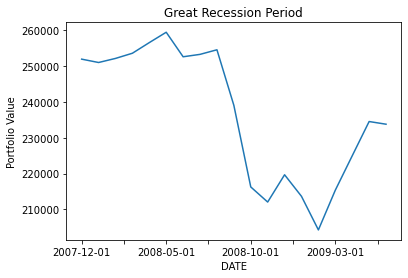

In [23]:
Great_recession["Portfolio"].plot()
plt.title('Great Recession Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

##  2. Growth Scenario: 2009-03-08 ~ 2010-04-22

In [24]:
open_day='2009-03-08'
close_day='2010-04-22'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
growth_scenario_cad=CAD_R[con1&con2]
growth_scenario_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
36,2009-04-01,0.092455,0.083779,0.098266,0.009797,0.007886,-0.027951,0.110740
37,2009-05-01,0.050584,0.125702,0.052631,0.000000,-0.014017,0.010117,0.143037
38,2009-06-01,-0.012037,-0.013724,-0.030000,0.002400,0.002452,0.010016,0.013172
39,2009-07-01,0.084303,0.050263,0.094972,0.015744,0.010525,0.048166,0.067950
40,2009-08-01,0.033130,-0.001820,0.039497,0.007831,0.008309,-0.007056,0.080042
41,2009-09-01,0.032911,0.035866,0.020150,0.002364,-0.000485,0.002538,0.058710
42,2009-10-01,-0.013889,-0.040629,-0.030474,0.010073,0.007393,0.031393,-0.010885
43,2009-11-01,0.059652,0.059077,0.017462,0.013495,0.013619,0.004909,0.013060
44,2009-12-01,0.007037,0.009297,0.024599,-0.024634,-0.027352,0.003908,0.068140
45,2010-01-01,-0.028141,-0.053515,-0.021739,0.027760,0.027838,0.022395,0.035022


In [25]:
growth_scenario_cad.to_csv('growth_scenario_cad.csv',encoding='utf-8',index=False)

In [26]:
growth_scenario_cad=pd.read_csv('growth_scenario_cad.csv',index_col=0)
growth_scenario_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2009-04-01,0.092455,0.083779,0.098266,0.009797,0.007886,-0.027951,0.110740
2009-05-01,0.050584,0.125702,0.052631,0.000000,-0.014017,0.010117,0.143037
2009-06-01,-0.012037,-0.013724,-0.030000,0.002400,0.002452,0.010016,0.013172
2009-07-01,0.084303,0.050263,0.094972,0.015744,0.010525,0.048166,0.067950
2009-08-01,0.033130,-0.001820,0.039497,0.007831,0.008309,-0.007056,0.080042
2009-09-01,0.032911,0.035866,0.020150,0.002364,-0.000485,0.002538,0.058710
2009-10-01,-0.013889,-0.040629,-0.030474,0.010073,0.007393,0.031393,-0.010885
2009-11-01,0.059652,0.059077,0.017462,0.013495,0.013619,0.004909,0.013060
2009-12-01,0.007037,0.009297,0.024599,-0.024634,-0.027352,0.003908,0.068140


In [27]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * growth_scenario_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * growth_scenario_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * growth_scenario_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * growth_scenario_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * growth_scenario_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * growth_scenario_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * growth_scenario_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [28]:
growth_scenario_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
growth_scenario_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403


In [29]:
#Select the historical time range for US asset

open_day='2009-03-08'
close_day='2010-04-22'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
growth_scenario_us = US_R[con1&con2]
growth_scenario_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
36,2009-04-01,0.107214,0.132476,0.174448,0.138518,0.115190,0.131662,0.090414,-0.001789,-0.027659,-0.022481,0.325360
37,2009-05-01,0.058454,0.032089,0.178894,0.232658,0.131918,0.142659,0.102887,0.000245,-0.020903,0.018337,0.022727
38,2009-06-01,-0.006268,0.028265,-0.024525,-0.072727,-0.034562,-0.023515,-0.029522,-0.000516,-0.005556,0.004562,-0.039408
39,2009-07-01,0.080676,0.085721,0.109051,0.134752,0.123796,0.113456,0.118234,0.001325,0.008515,0.000695,0.122542
40,2009-08-01,0.036940,0.014702,-0.007085,-0.017355,0.045030,0.054850,0.040051,0.004090,0.007516,0.008003,0.131939
41,2009-09-01,0.030549,0.055459,0.099601,0.071488,0.037965,0.048193,0.038688,0.002415,0.011335,0.015304,0.051503
42,2009-10-01,-0.014554,-0.029594,-0.024137,-0.063971,-0.025238,-0.025811,-0.011500,0.001407,-0.001313,0.020208,-0.041178
43,2009-11-01,0.061607,0.063476,0.071808,0.086373,0.039212,0.045332,0.055218,0.004934,0.014410,0.025081,0.070776
44,2009-12-01,0.013644,0.050275,0.017370,0.016210,-0.001986,-0.040000,-0.008557,-0.014016,-0.039889,-0.021838,0.057577
45,2010-01-01,-0.031154,-0.063139,-0.054658,-0.063046,-0.042012,-0.025966,-0.046400,0.015988,0.027893,0.019638,-0.043957


In [30]:
growth_scenario_us.to_csv('growth_scenario_us.csv',encoding='utf-8',index=False)

In [31]:
growth_scenario_us=pd.read_csv('growth_scenario_us.csv',index_col=0)
growth_scenario_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2009-04-01,0.107214,0.132476,0.174448,0.138518,0.115190,0.131662,0.090414,-0.001789,-0.027659,-0.022481,0.325360
2009-05-01,0.058454,0.032089,0.178894,0.232658,0.131918,0.142659,0.102887,0.000245,-0.020903,0.018337,0.022727
2009-06-01,-0.006268,0.028265,-0.024525,-0.072727,-0.034562,-0.023515,-0.029522,-0.000516,-0.005556,0.004562,-0.039408
2009-07-01,0.080676,0.085721,0.109051,0.134752,0.123796,0.113456,0.118234,0.001325,0.008515,0.000695,0.122542
2009-08-01,0.036940,0.014702,-0.007085,-0.017355,0.045030,0.054850,0.040051,0.004090,0.007516,0.008003,0.131939
2009-09-01,0.030549,0.055459,0.099601,0.071488,0.037965,0.048193,0.038688,0.002415,0.011335,0.015304,0.051503
2009-10-01,-0.014554,-0.029594,-0.024137,-0.063971,-0.025238,-0.025811,-0.011500,0.001407,-0.001313,0.020208,-0.041178
2009-11-01,0.061607,0.063476,0.071808,0.086373,0.039212,0.045332,0.055218,0.004934,0.014410,0.025081,0.070776
2009-12-01,0.013644,0.050275,0.017370,0.016210,-0.001986,-0.040000,-0.008557,-0.014016,-0.039889,-0.021838,0.057577


In [32]:
# Since we calculated the position of each us asset at report date are 7120.229419，5931.757721，7572.948462，2212.183591，8605.709738，5303.591925，8931.241234，19176.54759，19501.94537，38980.06789，6877.419259

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  7120.229419 * growth_scenario_us["SPY_R"] 
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  5931.757721 * growth_scenario_us["QQQ_R"] 
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  7572.948462 * growth_scenario_us["VWO_R"]
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  2212.183591 * growth_scenario_us["EWC_R"] 
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  8605.709738 * growth_scenario_us["EFA_R"]
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  5303.591925 * growth_scenario_us["VGK_R"] 
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  8931.241234 * growth_scenario_us["IOO_R"] 
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  19176.54759 * growth_scenario_us["SHY_R"] 
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  19501.94537 * growth_scenario_us["IEF_R"] 
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  38980.06789 * growth_scenario_us["TIP_R"] 
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  6877.419259 * growth_scenario_us["IYR_R"] 
IYR_R = IYR_R.to_frame(name='IYR_R')

In [33]:
growth_scenario_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
growth_scenario_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2009-04-01,763.390178,785.816592,1321.085865,306.426612,991.294398,698.279022,807.505646,-34.299403,-539.399510,-876.326069,2237.637309
2009-05-01,416.205912,190.343266,1354.758480,514.681732,1135.246916,756.606780,918.909135,4.701994,-407.644016,714.793448,156.305632
2009-06-01,-44.631620,167.658291,-185.726107,-160.886290,-297.433526,-124.714553,-263.665523,-9.894331,-108.358113,177.812920,-271.022443
2009-07-01,574.428311,508.473677,825.837451,298.097183,1065.352684,601.722888,1055.975635,25.407449,166.051206,27.095630,842.770895
2009-08-01,263.019267,87.208862,-53.651190,-38.393134,387.518939,290.899593,357.709519,78.441591,146.584266,311.940488,907.399661
2009-09-01,217.515063,328.966439,754.271755,158.145034,326.718137,255.593709,345.533772,46.302484,221.054902,596.553103,354.206782
2009-10-01,-103.625953,-175.544954,-182.789007,-141.516054,-217.190042,-136.893562,-102.713240,26.988574,-25.599580,787.692100,-283.198886
2009-11-01,438.653496,376.527029,543.801699,191.073185,337.448958,240.423591,493.165475,94.618121,281.022389,977.668672,486.758089
2009-12-01,97.145897,298.220857,131.542244,35.858434,-17.090053,-212.144743,-76.422407,-268.785318,-777.908516,-851.246917,395.982847


In [34]:
growth_scenario = growth_scenario_cad.merge(growth_scenario_us, on='DATE')
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166,763.390178,785.816592,1321.085865,306.426612,991.294398,698.279022,807.505646,-34.299403,-539.399510,-876.326069,2237.637309
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990,416.205912,190.343266,1354.758480,514.681732,1135.246916,756.606780,918.909135,4.701994,-407.644016,714.793448,156.305632
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475,-44.631620,167.658291,-185.726107,-160.886290,-297.433526,-124.714553,-263.665523,-9.894331,-108.358113,177.812920,-271.022443
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184,574.428311,508.473677,825.837451,298.097183,1065.352684,601.722888,1055.975635,25.407449,166.051206,27.095630,842.770895
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391,263.019267,87.208862,-53.651190,-38.393134,387.518939,290.899593,357.709519,78.441591,146.584266,311.940488,907.399661
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637,217.515063,328.966439,754.271755,158.145034,326.718137,255.593709,345.533772,46.302484,221.054902,596.553103,354.206782
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279,-103.625953,-175.544954,-182.789007,-141.516054,-217.190042,-136.893562,-102.713240,26.988574,-25.599580,787.692100,-283.198886
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650,438.653496,376.527029,543.801699,191.073185,337.448958,240.423591,493.165475,94.618121,281.022389,977.668672,486.758089
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403,97.145897,298.220857,131.542244,35.858434,-17.090053,-212.144743,-76.422407,-268.785318,-777.908516,-851.246917,395.982847


In [35]:
growth_scenario["Portfolio"] = growth_scenario.sum(axis=1)
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166,763.390178,785.816592,1321.085865,306.426612,991.294398,698.279022,807.505646,-34.299403,-539.399510,-876.326069,2237.637309,9594.384675
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990,416.205912,190.343266,1354.758480,514.681732,1135.246916,756.606780,918.909135,4.701994,-407.644016,714.793448,156.305632,9572.156870
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475,-44.631620,167.658291,-185.726107,-160.886290,-297.433526,-124.714553,-263.665523,-9.894331,-108.358113,177.812920,-271.022443,-747.650573
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184,574.428311,508.473677,825.837451,298.097183,1065.352684,601.722888,1055.975635,25.407449,166.051206,27.095630,842.770895,10837.653333
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391,263.019267,87.208862,-53.651190,-38.393134,387.518939,290.899593,357.709519,78.441591,146.584266,311.940488,907.399661,4833.966237
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637,217.515063,328.966439,754.271755,158.145034,326.718137,255.593709,345.533772,46.302484,221.054902,596.553103,354.206782,5297.445607
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279,-103.625953,-175.544954,-182.789007,-141.516054,-217.190042,-136.893562,-102.713240,26.988574,-25.599580,787.692100,-283.198886,228.972092
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650,438.653496,376.527029,543.801699,191.073185,337.448958,240.423591,493.165475,94.618121,281.022389,977.668672,486.758089,6295.018756
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403,97.145897,298.220857,131.542244,35.858434,-17.090053,-212.144743,-76.422407,-268.785318,-777.908516,-851.246917,395.982847,-966.560719


In [36]:
#Replace the first row portfolio value to the one at the report date. 
growth_scenario.iloc[0,18] = 251965.4709

In [37]:
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166,763.390178,785.816592,1321.085865,306.426612,991.294398,698.279022,807.505646,-34.299403,-539.399510,-876.326069,2237.637309,251965.470900
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990,416.205912,190.343266,1354.758480,514.681732,1135.246916,756.606780,918.909135,4.701994,-407.644016,714.793448,156.305632,9572.156870
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475,-44.631620,167.658291,-185.726107,-160.886290,-297.433526,-124.714553,-263.665523,-9.894331,-108.358113,177.812920,-271.022443,-747.650573
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184,574.428311,508.473677,825.837451,298.097183,1065.352684,601.722888,1055.975635,25.407449,166.051206,27.095630,842.770895,10837.653333
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391,263.019267,87.208862,-53.651190,-38.393134,387.518939,290.899593,357.709519,78.441591,146.584266,311.940488,907.399661,4833.966237
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637,217.515063,328.966439,754.271755,158.145034,326.718137,255.593709,345.533772,46.302484,221.054902,596.553103,354.206782,5297.445607
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279,-103.625953,-175.544954,-182.789007,-141.516054,-217.190042,-136.893562,-102.713240,26.988574,-25.599580,787.692100,-283.198886,228.972092
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650,438.653496,376.527029,543.801699,191.073185,337.448958,240.423591,493.165475,94.618121,281.022389,977.668672,486.758089,6295.018756
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403,97.145897,298.220857,131.542244,35.858434,-17.090053,-212.144743,-76.422407,-268.785318,-777.908516,-851.246917,395.982847,-966.560719


In [38]:
# Cumulative Portfolio Value
growth_scenario['Portfolio'] = np.cumsum(growth_scenario['Portfolio'])
growth_scenario

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2009-04-01,395.812912,476.510404,686.875564,159.968912,283.425341,-944.359264,2074.740166,763.390178,785.816592,1321.085865,306.426612,991.294398,698.279022,807.505646,-34.299403,-539.399510,-876.326069,2237.637309,251965.470900
2009-05-01,216.556998,714.957663,367.891946,0.000000,-503.806558,341.827554,2679.819990,416.205912,190.343266,1354.758480,514.681732,1135.246916,756.606780,918.909135,4.701994,-407.644016,714.793448,156.305632,261537.627770
2009-06-01,-51.533116,-78.059068,-209.699237,39.194672,88.125969,338.408029,246.773475,-44.631620,167.658291,-185.726107,-160.886290,-297.433526,-124.714553,-263.665523,-9.894331,-108.358113,177.812920,-271.022443,260789.977198
2009-07-01,360.913896,285.881889,663.850793,257.087256,378.288932,1627.358374,1273.059184,574.428311,508.473677,825.837451,298.097183,1065.352684,601.722888,1055.975635,25.407449,166.051206,27.095630,842.770895,271627.630531
2009-08-01,141.834964,-10.352413,276.084468,127.878900,298.657380,-238.413318,1499.598391,263.019267,87.208862,-53.651190,-38.393134,387.518939,290.899593,357.709519,78.441591,146.584266,311.940488,907.399661,276461.596768
2009-09-01,140.897340,203.997646,140.845939,38.597439,-17.444152,85.747579,1099.942637,217.515063,328.966439,754.271755,158.145034,326.718137,255.593709,345.533772,46.302484,221.054902,596.553103,354.206782,281759.042375
2009-10-01,-59.459620,-231.086545,-213.012238,164.489575,265.713346,1060.645457,-203.927279,-103.625953,-175.544954,-182.789007,-141.516054,-217.190042,-136.893562,-102.713240,26.988574,-25.599580,787.692100,-283.198886,281988.014467
2009-11-01,255.379295,336.012912,122.060298,220.366720,489.497916,165.858262,244.682650,438.653496,376.527029,543.801699,191.073185,337.448958,240.423591,493.165475,94.618121,281.022389,977.668672,486.758089,288283.033223
2009-12-01,30.125763,52.879487,171.948193,-402.247952,-983.083671,132.047735,1276.617403,97.145897,298.220857,131.542244,35.858434,-17.090053,-212.144743,-76.422407,-268.785318,-777.908516,-851.246917,395.982847,287316.472504


In [39]:
growth_scenario.to_csv('growth_scenario.csv')

Text(0, 0.5, 'Portfolio Value')

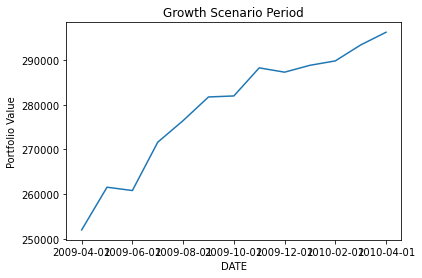

In [40]:
growth_scenario["Portfolio"].plot()
plt.title('Growth Scenario Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

## 3.  2015-2016 Growth Scare: 2015-07 ~ 2016-01

In [41]:
open_day='2015-07-01'
close_day='2016-01-01'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
growth_scare_cad = CAD_R[con1&con2]
growth_scare_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
111,2015-07-01,0.032855,0.016215,0.053342,0.017291,0.013946,0.026642,0.005533
112,2015-08-01,-0.062423,-0.045581,-0.080418,-0.012011,-0.008945,-0.032051,-0.054291
113,2015-09-01,-0.026719,-0.038987,-0.042414,-0.002418,-0.005602,0.000828,0.017110
114,2015-10-01,0.082358,0.022659,0.068036,-0.003053,-0.001053,-0.019024,0.007168
115,2015-11-01,0.004574,-0.001499,0.017529,0.001108,-0.001108,0.008853,-0.010731
116,2015-12-01,-0.029801,-0.038038,-0.045378,0.011656,0.012662,0.013373,-0.034124
117,2016-01-01,-0.042112,-0.008059,-0.034896,0.002059,0.005715,0.002320,0.007495


In [42]:
growth_scare_cad.to_csv('growth_scare_cad.csv',encoding='utf-8',index=False)

In [43]:
growth_scare_cad=pd.read_csv('growth_scare_cad.csv',index_col=0)
growth_scare_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2015-07-01,0.032855,0.016215,0.053342,0.017291,0.013946,0.026642,0.005533
2015-08-01,-0.062423,-0.045581,-0.080418,-0.012011,-0.008945,-0.032051,-0.054291
2015-09-01,-0.026719,-0.038987,-0.042414,-0.002418,-0.005602,0.000828,0.017110
2015-10-01,0.082358,0.022659,0.068036,-0.003053,-0.001053,-0.019024,0.007168
2015-11-01,0.004574,-0.001499,0.017529,0.001108,-0.001108,0.008853,-0.010731
2015-12-01,-0.029801,-0.038038,-0.045378,0.011656,0.012662,0.013373,-0.034124
2016-01-01,-0.042112,-0.008059,-0.034896,0.002059,0.005715,0.002320,0.007495


In [44]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * growth_scare_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * growth_scare_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * growth_scare_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * growth_scare_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * growth_scare_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * growth_scare_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * growth_scare_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [45]:
growth_scare_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
growth_scare_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418


In [46]:
#Select the historical time range for US asset
open_day='2015-07-01'
close_day='2016-01-01'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
growth_scare_us = US_R[con1&con2]
growth_scare_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
111,2015-07-01,0.027564,0.047983,-0.053932,-0.034628,0.037546,0.042748,0.031721,0.000436,0.015223,0.005355,0.058938
112,2015-08-01,-0.060950,-0.068245,-0.098643,-0.050098,-0.074251,-0.070192,-0.068473,-0.000495,0.000792,-0.009498,-0.058132
113,2015-09-01,-0.030556,-0.024446,-0.041980,-0.052328,-0.044189,-0.045604,-0.027547,0.002926,0.015763,-0.007977,0.006669
114,2015-10-01,0.090701,0.116408,0.067353,0.034783,0.066120,0.063855,0.091198,-0.001412,-0.006320,0.005214,0.072164
115,2015-11-01,0.003655,0.006088,-0.022962,-0.022269,-0.007527,-0.012481,-0.003841,-0.002595,-0.004280,-0.000882,-0.001991
116,2015-12-01,-0.023097,-0.018944,-0.039072,-0.076064,-0.031822,-0.030138,-0.031644,-0.002001,-0.006099,-0.010109,-0.001728
117,2016-01-01,-0.044132,-0.066261,-0.052861,-0.014225,-0.046879,-0.051650,-0.043208,0.007521,0.036546,0.015682,-0.028745


In [47]:
growth_scare_us.to_csv('growth_scare_us.csv',encoding='utf-8',index=False)

In [48]:
growth_scare_us=pd.read_csv('growth_scare_us.csv',index_col=0)
growth_scare_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2015-07-01,0.027564,0.047983,-0.053932,-0.034628,0.037546,0.042748,0.031721,0.000436,0.015223,0.005355,0.058938
2015-08-01,-0.060950,-0.068245,-0.098643,-0.050098,-0.074251,-0.070192,-0.068473,-0.000495,0.000792,-0.009498,-0.058132
2015-09-01,-0.030556,-0.024446,-0.041980,-0.052328,-0.044189,-0.045604,-0.027547,0.002926,0.015763,-0.007977,0.006669
2015-10-01,0.090701,0.116408,0.067353,0.034783,0.066120,0.063855,0.091198,-0.001412,-0.006320,0.005214,0.072164
2015-11-01,0.003655,0.006088,-0.022962,-0.022269,-0.007527,-0.012481,-0.003841,-0.002595,-0.004280,-0.000882,-0.001991
2015-12-01,-0.023097,-0.018944,-0.039072,-0.076064,-0.031822,-0.030138,-0.031644,-0.002001,-0.006099,-0.010109,-0.001728
2016-01-01,-0.044132,-0.066261,-0.052861,-0.014225,-0.046879,-0.051650,-0.043208,0.007521,0.036546,0.015682,-0.028745


In [49]:
# Since we calculated the position of each us asset at report date are 7120.229419，5931.757721，7572.948462，2212.183591，8605.709738，5303.591925，8931.241234，19176.54759，19501.94537，38980.06789，6877.419259

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  7120.229419 * growth_scare_us["SPY_R"] 
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  5931.757721 * growth_scare_us["QQQ_R"] 
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  7572.948462 * growth_scare_us["VWO_R"]
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  2212.183591 * growth_scare_us["EWC_R"] 
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  8605.709738 * growth_scare_us["EFA_R"]
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  5303.591925 * growth_scare_us["VGK_R"] 
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  8931.241234 * growth_scare_us["IOO_R"] 
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  19176.54759 * growth_scare_us["SHY_R"] 
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  19501.94537 * growth_scare_us["IEF_R"] 
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  38980.06789 * growth_scare_us["TIP_R"] 
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  6877.419259 * growth_scare_us["IYR_R"] 
IYR_R = IYR_R.to_frame(name='IYR_R')

In [50]:
growth_scare_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
growth_scare_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2015-07-01,196.258721,284.620648,-408.423545,-76.602779,323.107370,226.719979,283.304974,8.363794,296.870743,208.737016,405.339665
2015-08-01,-433.979151,-404.810824,-747.017901,-110.825082,-638.984413,-372.267523,-611.552328,-9.492947,15.448408,-370.250966,-399.796197
2015-09-01,-217.565431,-145.009185,-317.915353,-115.759466,-380.276400,-241.866772,-246.032457,56.105784,307.400721,-310.927669,45.862290
2015-10-01,645.810860,690.505945,510.061328,76.945517,569.009605,338.661228,814.512588,-27.067754,-123.252899,203.241216,496.304491
2015-11-01,26.025229,36.114160,-173.888672,-49.262508,-64.778473,-66.192227,-34.305621,-49.768491,-83.461618,-34.382291,-13.690810
2015-12-01,-164.453005,-112.370447,-295.889765,-168.266825,-273.850336,-159.840322,-282.624288,-38.368839,-118.939927,-394.030094,-11.886574
2016-01-01,-314.226440,-393.045758,-400.311910,-31.468754,-403.428822,-273.931096,-385.899758,144.226316,712.719071,611.286594,-197.688886


In [51]:
growth_scare = growth_scare_cad.merge(growth_scare_us, on='DATE')
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,196.258721,284.620648,-408.423545,-76.602779,323.107370,226.719979,283.304974,8.363794,296.870743,208.737016,405.339665
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-433.979151,-404.810824,-747.017901,-110.825082,-638.984413,-372.267523,-611.552328,-9.492947,15.448408,-370.250966,-399.796197
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-217.565431,-145.009185,-317.915353,-115.759466,-380.276400,-241.866772,-246.032457,56.105784,307.400721,-310.927669,45.862290
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,645.810860,690.505945,510.061328,76.945517,569.009605,338.661228,814.512588,-27.067754,-123.252899,203.241216,496.304491
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,26.025229,36.114160,-173.888672,-49.262508,-64.778473,-66.192227,-34.305621,-49.768491,-83.461618,-34.382291,-13.690810
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-164.453005,-112.370447,-295.889765,-168.266825,-273.850336,-159.840322,-282.624288,-38.368839,-118.939927,-394.030094,-11.886574
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-314.226440,-393.045758,-400.311910,-31.468754,-403.428822,-273.931096,-385.899758,144.226316,712.719071,611.286594,-197.688886


In [52]:
growth_scare["Portfolio"] = growth_scare.sum(axis=1)
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,196.258721,284.620648,-408.423545,-76.602779,323.107370,226.719979,283.304974,8.363794,296.870743,208.737016,405.339665,4141.438680
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-433.979151,-404.810824,-747.017901,-110.825082,-638.984413,-372.267523,-611.552328,-9.492947,15.448408,-370.250966,-399.796197,-7789.851524
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-217.565431,-145.009185,-317.915353,-115.759466,-380.276400,-241.866772,-246.032457,56.105784,307.400721,-310.927669,45.862290,-2090.885699
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,645.810860,690.505945,510.061328,76.945517,569.009605,338.661228,814.512588,-27.067754,-123.252899,203.241216,496.304491,4555.624587
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,26.025229,36.114160,-173.888672,-49.262508,-64.778473,-66.192227,-34.305621,-49.768491,-83.461618,-34.382291,-13.690810,-297.677361
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-164.453005,-112.370447,-295.889765,-168.266825,-273.850336,-159.840322,-282.624288,-38.368839,-118.939927,-394.030094,-11.886574,-2223.716924
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-314.226440,-393.045758,-400.311910,-31.468754,-403.428822,-273.931096,-385.899758,144.226316,712.719071,611.286594,-197.688886,-943.947725


In [53]:
growth_scare.iloc[0,18] = 251965.4709

In [54]:
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,196.258721,284.620648,-408.423545,-76.602779,323.107370,226.719979,283.304974,8.363794,296.870743,208.737016,405.339665,251965.470900
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-433.979151,-404.810824,-747.017901,-110.825082,-638.984413,-372.267523,-611.552328,-9.492947,15.448408,-370.250966,-399.796197,-7789.851524
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-217.565431,-145.009185,-317.915353,-115.759466,-380.276400,-241.866772,-246.032457,56.105784,307.400721,-310.927669,45.862290,-2090.885699
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,645.810860,690.505945,510.061328,76.945517,569.009605,338.661228,814.512588,-27.067754,-123.252899,203.241216,496.304491,4555.624587
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,26.025229,36.114160,-173.888672,-49.262508,-64.778473,-66.192227,-34.305621,-49.768491,-83.461618,-34.382291,-13.690810,-297.677361
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-164.453005,-112.370447,-295.889765,-168.266825,-273.850336,-159.840322,-282.624288,-38.368839,-118.939927,-394.030094,-11.886574,-2223.716924
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-314.226440,-393.045758,-400.311910,-31.468754,-403.428822,-273.931096,-385.899758,144.226316,712.719071,611.286594,-197.688886,-943.947725


In [55]:
# Cumulative Portfolio Value
growth_scare['Portfolio'] = np.cumsum(growth_scare['Portfolio'])
growth_scare

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2015-07-01,140.658370,92.224552,372.861570,282.343671,501.263057,900.126804,103.664070,196.258721,284.620648,-408.423545,-76.602779,323.107370,226.719979,283.304974,8.363794,296.870743,208.737016,405.339665,251965.470900
2015-08-01,-267.242852,-259.252813,-562.120997,-196.129430,-321.520859,-1082.900853,-1017.154794,-433.979151,-404.810824,-747.017901,-110.825082,-638.984413,-372.267523,-611.552328,-9.492947,15.448408,-370.250966,-399.796197,244175.619376
2015-09-01,-114.390261,-221.744257,-296.470358,-39.480135,-201.347224,27.968007,320.562466,-217.565431,-145.009185,-317.915353,-115.759466,-380.276400,-241.866772,-246.032457,56.105784,307.400721,-310.927669,45.862290,242084.733677
2015-10-01,352.589027,128.878036,475.572926,-49.844516,-37.841189,-642.746929,134.285109,645.810860,690.505945,510.061328,76.945517,569.009605,338.661228,814.512588,-27.067754,-123.252899,203.241216,496.304491,246640.358265
2015-11-01,19.581628,-8.528593,122.526955,18.093951,-39.832795,299.118963,-201.046150,26.025229,36.114160,-173.888672,-49.262508,-64.778473,-66.192227,-34.305621,-49.768491,-83.461618,-34.382291,-13.690810,246342.680903
2015-12-01,-127.584847,-216.347956,-317.192746,190.332363,455.102347,451.809772,-639.315435,-164.453005,-112.370447,-295.889765,-168.266825,-273.850336,-159.840322,-282.624288,-38.368839,-118.939927,-394.030094,-11.886574,244118.963980
2016-01-01,-180.289788,-45.839917,-243.919955,33.623500,205.423886,78.397576,140.426418,-314.226440,-393.045758,-400.311910,-31.468754,-403.428822,-273.931096,-385.899758,144.226316,712.719071,611.286594,-197.688886,243175.016254


In [56]:
growth_scare.to_csv('growth_scare.csv')

Text(0, 0.5, 'Portfolio Value')

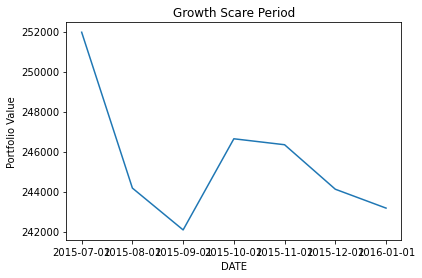

In [57]:
growth_scare["Portfolio"].plot()
plt.title('Growth Scare Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

## 4.  Covid-19 Period: 2020-02 ~ 2021-06

In [58]:
open_day='2020-02-01'
close_day='2021-06-01'
con1=CAD_R['DATE']>=open_day
con2=CAD_R['DATE']<=close_day
covid_cad = CAD_R[con1&con2]
covid_cad

,DATE,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
166,2020-02-01,-0.080473,-0.061350,-0.071322,0.005312,0.007174,0.012002,-0.034979
167,2020-03-01,-0.136475,-0.150315,-0.141200,-0.033476,-0.005633,-0.076894,-0.272430
168,2020-04-01,0.124026,0.092978,0.055892,0.052750,0.032464,0.051803,0.061883
169,2020-05-01,0.048235,0.019052,0.052051,0.003723,0.001387,0.013002,-0.022028
170,2020-06-01,0.012030,0.033311,0.014675,0.017953,0.013425,0.016336,0.030267
171,2020-07-01,0.064593,0.041189,-0.010238,0.014390,0.011574,0.057263,0.012595
172,2020-08-01,0.065823,0.014682,0.037553,-0.014118,-0.015537,-0.008029,-0.018741
173,2020-09-01,-0.039588,-0.012715,-0.008133,0.003909,0.004744,0.001472,-0.008430
174,2020-10-01,-0.024732,-0.034865,-0.034850,-0.008661,-0.008086,-0.005143,-0.023549
175,2020-11-01,0.105663,0.097748,0.121070,0.011783,0.006898,0.017356,0.172612


In [59]:
covid_cad.to_csv('covid_cad.csv',encoding='utf-8',index=False)

In [60]:
covid_cad=pd.read_csv('covid_cad.csv',index_col=0)
covid_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2020-02-01,-0.080473,-0.061350,-0.071322,0.005312,0.007174,0.012002,-0.034979
2020-03-01,-0.136475,-0.150315,-0.141200,-0.033476,-0.005633,-0.076894,-0.272430
2020-04-01,0.124026,0.092978,0.055892,0.052750,0.032464,0.051803,0.061883
2020-05-01,0.048235,0.019052,0.052051,0.003723,0.001387,0.013002,-0.022028
2020-06-01,0.012030,0.033311,0.014675,0.017953,0.013425,0.016336,0.030267
2020-07-01,0.064593,0.041189,-0.010238,0.014390,0.011574,0.057263,0.012595
2020-08-01,0.065823,0.014682,0.037553,-0.014118,-0.015537,-0.008029,-0.018741
2020-09-01,-0.039588,-0.012715,-0.008133,0.003909,0.004744,0.001472,-0.008430
2020-10-01,-0.024732,-0.034865,-0.034850,-0.008661,-0.008086,-0.005143,-0.023549


In [61]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO_R=  4281.155492 * covid_cad["XSP.TO_R"]
XSPTO_R = XSPTO_R.to_frame(name='XSP.TO_R')

XIUTO_R=  5687.704412 * covid_cad["XIU.TO_R"]
XIUTO_R = XIUTO_R.to_frame(name='XIU.TO_R')

XINTO_R=  6989.969684 * covid_cad["XIN.TO_R"]
XINTO_R = XINTO_R.to_frame(name='XIN.TO_R')

XBBTO_R=  16328.983559 * covid_cad["XBB.TO_R"]
XBBTO_R = XBBTO_R.to_frame(name='XBB.TO_R')

XGBTO_R=  35942.422838 * covid_cad["XGB.TO_R"]
XGBTO_R = XGBTO_R.to_frame(name='XGB.TO_R')

XRBTO_R=  33786.437108 * covid_cad["XRB.TO_R"]
XRBTO_R = XRBTO_R.to_frame(name='XRB.TO_R')

XRETO_R=  18735.155645 * covid_cad["XRE.TO_R"]
XRETO_R = XRETO_R.to_frame(name='XRE.TO_R')

In [62]:
covid_cad = XSPTO_R.merge(XIUTO_R, on='DATE').merge(XINTO_R, on='DATE').merge(XBBTO_R, on='DATE').merge(XGBTO_R, on='DATE').merge(XRBTO_R, on='DATE').merge(XRETO_R, on='DATE')
covid_cad

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719


In [63]:
#Select the historical time range for US asset

open_day='2020-02-01'
close_day='2021-06-01'
con1=US_R['DATE']>=open_day
con2=US_R['DATE']<=close_day
covid_us = US_R[con1&con2]
covid_us

,DATE,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
166,2020-02-01,-0.079166,-0.060574,-0.035468,-0.070104,-0.077653,-0.079591,-0.085334,7.166530e-03,0.028236,0.008147,-0.075817
167,2020-03-01,-0.129987,-0.074830,-0.172014,-0.208046,-0.141067,-0.171992,-0.098142,1.257045e-02,0.037380,-0.016530,-0.204005
168,2020-04-01,0.133611,0.152188,0.080106,0.111213,0.058174,0.071486,0.110838,2.962356e-03,0.002761,0.028748,0.103691
169,2020-05-01,0.047645,0.066009,0.032900,0.035420,0.054269,0.058389,0.032251,-3.903250e-04,0.003409,0.005540,0.018015
170,2020-06-01,0.013275,0.061022,0.060225,0.029435,0.020624,0.032199,0.030658,2.527870e-04,0.000478,0.012339,0.017954
171,2020-07-01,0.063552,0.075332,0.090494,0.065964,0.033856,0.043715,0.055188,1.039414e-03,0.008640,0.023252,0.048155
172,2020-08-01,0.069797,0.109447,0.027435,0.051263,0.047220,0.043128,0.077607,-1.037980e-04,-0.009611,0.008899,0.002315
173,2020-09-01,-0.041281,-0.057786,-0.021498,-0.045280,-0.020468,-0.036567,-0.052667,-3.539950e-07,0.003368,-0.003780,-0.029301
174,2020-10-01,-0.021030,-0.030449,0.023060,-0.034294,-0.035507,-0.048868,-0.031083,-3.589510e-04,-0.013733,-0.010040,-0.023296
175,2020-11-01,0.108777,0.112258,0.085597,0.143937,0.142694,0.163944,0.110541,2.310640e-04,0.003399,0.012841,0.085795


In [64]:
covid_us.to_csv('covid_us.csv',encoding='utf-8',index=False)

In [65]:
covid_us=pd.read_csv('covid_us.csv',index_col=0)
covid_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2020-02-01,-0.079166,-0.060574,-0.035468,-0.070104,-0.077653,-0.079591,-0.085334,7.166530e-03,0.028236,0.008147,-0.075817
2020-03-01,-0.129987,-0.074830,-0.172014,-0.208046,-0.141067,-0.171992,-0.098142,1.257045e-02,0.037380,-0.016530,-0.204005
2020-04-01,0.133611,0.152188,0.080106,0.111213,0.058174,0.071486,0.110838,2.962356e-03,0.002761,0.028748,0.103691
2020-05-01,0.047645,0.066009,0.032900,0.035420,0.054269,0.058389,0.032251,-3.903250e-04,0.003409,0.005540,0.018015
2020-06-01,0.013275,0.061022,0.060225,0.029435,0.020624,0.032199,0.030658,2.527870e-04,0.000478,0.012339,0.017954
2020-07-01,0.063552,0.075332,0.090494,0.065964,0.033856,0.043715,0.055188,1.039414e-03,0.008640,0.023252,0.048155
2020-08-01,0.069797,0.109447,0.027435,0.051263,0.047220,0.043128,0.077607,-1.037980e-04,-0.009611,0.008899,0.002315
2020-09-01,-0.041281,-0.057786,-0.021498,-0.045280,-0.020468,-0.036567,-0.052667,-3.539950e-07,0.003368,-0.003780,-0.029301
2020-10-01,-0.021030,-0.030449,0.023060,-0.034294,-0.035507,-0.048868,-0.031084,-3.589510e-04,-0.013733,-0.010040,-0.023296


In [66]:
# Since we calculated the position of each us asset at report date are 7120.229419，5931.757721，7572.948462，2212.183591，8605.709738，5303.591925，8931.241234，19176.54759，19501.94537，38980.06789，6877.419259

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY_R=  7120.229419 * covid_us["SPY_R"] 
SPY_R = SPY_R.to_frame(name='SPY_R')

QQQ_R=  5931.757721 * covid_us["QQQ_R"] 
QQQ_R = QQQ_R.to_frame(name='QQQ_R')

VWO_R=  7572.948462 * covid_us["VWO_R"]
VWO_R = VWO_R.to_frame(name='VWO_R')

EWC_R=  2212.183591 * covid_us["EWC_R"] 
EWC_R = EWC_R.to_frame(name='EWC_R')

EFA_R=  8605.709738 * covid_us["EFA_R"]
EFA_R = EFA_R.to_frame(name='EFA_R')

VGK_R=  5303.591925 * covid_us["VGK_R"] 
VGK_R = VGK_R.to_frame(name='VGK_R')

IOO_R=  8931.241234 * covid_us["IOO_R"] 
IOO_R = IOO_R.to_frame(name='IOO_R')

SHY_R=  19176.54759 * covid_us["SHY_R"] 
SHY_R = SHY_R.to_frame(name='SHY_R')

IEF_R=  19501.94537 * covid_us["IEF_R"] 
IEF_R = IEF_R.to_frame(name='IEF_R')

TIP_R=  38980.06789 * covid_us["TIP_R"] 
TIP_R = TIP_R.to_frame(name='TIP_R')

IYR_R=  6877.419259 * covid_us["IYR_R"] 
IYR_R = IYR_R.to_frame(name='IYR_R')

In [67]:
covid_us = SPY_R.merge(QQQ_R, on='DATE').merge(VWO_R, on='DATE').merge(EWC_R, on='DATE').merge(EFA_R, on='DATE').merge(VGK_R, on='DATE').merge(IOO_R, on='DATE').merge(SHY_R, on='DATE').merge(IEF_R, on='DATE').merge(TIP_R, on='DATE').merge(IYR_R, on='DATE')
covid_us

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2020-02-01,-563.678245,-359.311745,-268.594754,-155.083921,-668.256786,-422.120174,-762.141174,137.429304,550.647452,317.577980,-521.424154
2020-03-01,-925.539689,-443.873140,-1302.652369,-460.236704,-1213.980210,-912.173765,-876.532146,241.057813,728.991123,-644.334285,-1403.025172
2020-04-01,951.338495,902.739627,606.634853,246.022890,500.631433,379.130069,989.916540,56.807761,53.849103,1120.606515,713.127010
2020-05-01,339.245545,391.548779,249.152185,78.355813,467.023924,309.672834,288.045730,-7.485086,66.474936,215.959282,123.893372
2020-06-01,94.522854,361.965371,456.079587,65.115916,177.481533,170.768081,273.815191,4.847582,9.328463,480.974746,123.477976
2020-07-01,452.504371,446.851558,685.302899,145.925443,291.356811,231.845890,492.893313,19.932372,168.500377,906.367306,331.183094
2020-08-01,496.968873,649.214066,207.767347,113.403849,406.361941,228.734267,693.122614,-1.990487,-187.431461,346.873061,15.923502
2020-09-01,-293.932327,-342.772973,-162.803026,-100.168461,-176.140660,-193.938780,-470.381512,-0.006788,65.687427,-147.349022,-201.515138
2020-10-01,-149.741358,-180.617497,174.634161,-75.864746,-305.560190,-259.175379,-277.614237,-6.883441,-267.826573,-391.343042,-160.212934


In [68]:
covid = covid_cad.merge(covid_us, on='DATE')
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-563.678245,-359.311745,-268.594754,-155.083921,-668.256786,-422.120174,-762.141174,137.429304,550.647452,317.577980,-521.424154
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-925.539689,-443.873140,-1302.652369,-460.236704,-1213.980210,-912.173765,-876.532146,241.057813,728.991123,-644.334285,-1403.025172
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,951.338495,902.739627,606.634853,246.022890,500.631433,379.130069,989.916540,56.807761,53.849103,1120.606515,713.127010
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,339.245545,391.548779,249.152185,78.355813,467.023924,309.672834,288.045730,-7.485086,66.474936,215.959282,123.893372
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,94.522854,361.965371,456.079587,65.115916,177.481533,170.768081,273.815191,4.847582,9.328463,480.974746,123.477976
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,452.504371,446.851558,685.302899,145.925443,291.356811,231.845890,492.893313,19.932372,168.500377,906.367306,331.183094
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,496.968873,649.214066,207.767347,113.403849,406.361941,228.734267,693.122614,-1.990487,-187.431461,346.873061,15.923502
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-293.932327,-342.772973,-162.803026,-100.168461,-176.140660,-193.938780,-470.381512,-0.006788,65.687427,-147.349022,-201.515138
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-149.741358,-180.617497,174.634161,-75.864746,-305.560190,-259.175379,-277.614237,-6.883441,-267.826573,-391.343042,-160.212934


In [69]:
covid["Portfolio"] = covid.sum(axis=1)
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-563.678245,-359.311745,-268.594754,-155.083921,-668.256786,-422.120174,-762.141174,137.429304,550.647452,317.577980,-521.424154,-3812.224105
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-925.539689,-443.873140,-1302.652369,-460.236704,-1213.980210,-912.173765,-876.532146,241.057813,728.991123,-644.334285,-1403.025172,-18089.594690
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,951.338495,902.739627,606.634853,246.022890,500.631433,379.130069,989.916540,56.807761,53.849103,1120.606515,713.127010,12909.086648
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,339.245545,391.548779,249.152185,78.355813,467.023924,309.672834,288.045730,-7.485086,66.474936,215.959282,123.893372,3337.838653
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,94.522854,361.965371,456.079587,65.115916,177.481533,170.768081,273.815191,4.847582,9.328463,480.974746,123.477976,4456.612251
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,452.504371,446.851558,685.302899,145.925443,291.356811,231.845890,492.893313,19.932372,168.500377,906.367306,331.183094,7433.548818
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,496.968873,649.214066,207.767347,113.403849,406.361941,228.734267,693.122614,-1.990487,-187.431461,346.873061,15.923502,2185.372506
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-293.932327,-342.772973,-162.803026,-100.168461,-176.140660,-193.938780,-470.381512,-0.006788,65.687427,-147.349022,-201.515138,-2195.843466
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-149.741358,-180.617497,174.634161,-75.864746,-305.560190,-259.175379,-277.614237,-6.883441,-267.826573,-391.343042,-160.212934,-3495.025768


In [70]:
covid.iloc[0,18] = 251965.4709

In [71]:
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-563.678245,-359.311745,-268.594754,-155.083921,-668.256786,-422.120174,-762.141174,137.429304,550.647452,317.577980,-521.424154,251965.470900
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-925.539689,-443.873140,-1302.652369,-460.236704,-1213.980210,-912.173765,-876.532146,241.057813,728.991123,-644.334285,-1403.025172,-18089.594690
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,951.338495,902.739627,606.634853,246.022890,500.631433,379.130069,989.916540,56.807761,53.849103,1120.606515,713.127010,12909.086648
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,339.245545,391.548779,249.152185,78.355813,467.023924,309.672834,288.045730,-7.485086,66.474936,215.959282,123.893372,3337.838653
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,94.522854,361.965371,456.079587,65.115916,177.481533,170.768081,273.815191,4.847582,9.328463,480.974746,123.477976,4456.612251
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,452.504371,446.851558,685.302899,145.925443,291.356811,231.845890,492.893313,19.932372,168.500377,906.367306,331.183094,7433.548818
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,496.968873,649.214066,207.767347,113.403849,406.361941,228.734267,693.122614,-1.990487,-187.431461,346.873061,15.923502,2185.372506
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-293.932327,-342.772973,-162.803026,-100.168461,-176.140660,-193.938780,-470.381512,-0.006788,65.687427,-147.349022,-201.515138,-2195.843466
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-149.741358,-180.617497,174.634161,-75.864746,-305.560190,-259.175379,-277.614237,-6.883441,-267.826573,-391.343042,-160.212934,-3495.025768


In [72]:
# Cumulative Portfolio Value
covid['Portfolio'] = np.cumsum(covid['Portfolio'])
covid

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R,Portfolio
DATE,,,,,,,,,,,,,,,,,,,
2020-02-01,-344.516381,-348.939255,-498.541057,86.732245,257.849144,405.490290,-655.342873,-563.678245,-359.311745,-268.594754,-155.083921,-668.256786,-422.120174,-762.141174,137.429304,550.647452,317.577980,-521.424154,251965.470900
2020-03-01,-584.270721,-854.946828,-986.984083,-546.636271,-202.476248,-2597.961389,-5104.020607,-925.539689,-443.873140,-1302.652369,-460.236704,-1213.980210,-912.173765,-876.532146,241.057813,728.991123,-644.334285,-1403.025172,233875.876210
2020-04-01,530.972463,528.831887,390.683770,861.349980,1166.820115,1750.228632,1159.395506,951.338495,902.739627,606.634853,246.022890,500.631433,379.130069,989.916540,56.807761,53.849103,1120.606515,713.127010,246784.962859
2020-05-01,206.500062,108.361240,363.835947,60.785588,49.860803,439.306662,-412.698964,339.245545,391.548779,249.152185,78.355813,467.023924,309.672834,288.045730,-7.485086,66.474936,215.959282,123.893372,250122.801511
2020-06-01,51.502228,189.462217,102.577910,293.157883,482.542015,551.935406,567.057293,94.522854,361.965371,456.079587,65.115916,177.481533,170.768081,273.815191,4.847582,9.328463,480.974746,123.477976,254579.413762
2020-07-01,276.532514,234.271005,-71.566001,234.977290,416.011080,1934.698152,235.961342,452.504371,446.851558,685.302899,145.925443,291.356811,231.845890,492.893313,19.932372,168.500377,906.367306,331.183094,262012.962580
2020-08-01,281.797599,83.506478,262.492465,-230.536297,-558.451333,-271.275020,-351.108957,496.968873,649.214066,207.767347,113.403849,406.361941,228.734267,693.122614,-1.990487,-187.431461,346.873061,15.923502,264198.335086
2020-09-01,-169.483467,-72.320481,-56.852555,63.836855,170.523614,49.719546,-157.945718,-293.932327,-342.772973,-162.803026,-100.168461,-176.140660,-193.938780,-470.381512,-0.006788,65.687427,-147.349022,-201.515138,262002.491620
2020-10-01,-105.881662,-198.299954,-243.602191,-141.422502,-290.639992,-173.773512,-441.200719,-149.741358,-180.617497,174.634161,-75.864746,-305.560190,-259.175379,-277.614237,-6.883441,-267.826573,-391.343042,-160.212934,258507.465852


In [73]:
covid.to_csv('covid.csv')

Text(0, 0.5, 'Portfolio Value')

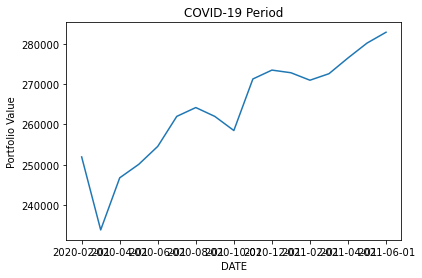

In [74]:
covid["Portfolio"].plot()
plt.title('COVID-19 Period')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')

# Hypothetical Scenario

#####  First, use VAR model to predict the next 4 quarters for Macro data, then run OLS regression between Macro and Factor data, so we will get the Factor data in next 4 quarter. Then, run OLS between Fatcor and Asset therefore we will get the predicted returns of asset.

In [76]:
ecodata = pd.read_csv('ecodata.csv',index_col=0) 

In [77]:
ecodata = ecodata.dropna()
ecodata

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


###  VAR Model fitting

In [78]:
from statsmodels.tsa.api import VAR

In [79]:
model = VAR(ecodata)
model_fitted = model.fit(1)

/Users/Grace/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [80]:
# Get the lag order
lag_order = 1

# Input data for forecasting
forecast_input = ecodata.values[-lag_order:]
forecast_input

array([[5.188000e-03, 8.449000e-03, 1.043550e-01, 8.000000e-02,
        6.166667e+00, 1.553500e-02, 9.171000e-03, 1.303295e+00]])

In [81]:
# Forecast (next 5 quarter)
num_q = 5
fc = model_fitted.forecast(y=forecast_input, steps=num_q)
eco_forecast=pd.DataFrame(fc,index=pd.date_range(start=ecodata.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=ecodata.columns)
eco_forecast

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,0.004618,0.005960,0.445443,0.352996,5.815062,0.007840,0.005197,1.264043
2021-07-01,0.004098,0.004136,0.536391,0.443854,5.806782,0.004756,0.003956,1.254990
2021-10-01,0.003938,0.004352,0.549658,0.484027,5.879046,0.004384,0.003665,1.255162
2022-01-01,0.003863,0.004657,0.547055,0.516060,5.944739,0.004589,0.003623,1.256722
2022-04-01,0.003833,0.004980,0.548580,0.553167,5.986787,0.004912,0.003650,1.258009


###  Forecasted Macro Data

In [82]:
eco_forecast = eco_forecast.iloc[-4:]
eco_forecast = eco_forecast.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
eco_forecast

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.004098,0.004136,0.536391,0.443854,5.806782,0.004756,0.003956,1.254990
Q2,0.003938,0.004352,0.549658,0.484027,5.879046,0.004384,0.003665,1.255162
Q3,0.003863,0.004657,0.547055,0.516060,5.944739,0.004589,0.003623,1.256722
Q4,0.003833,0.004980,0.548580,0.553167,5.986787,0.004912,0.003650,1.258009


In [83]:
eco_forecast.to_csv('eco_forecast.csv')

## OLS between Ecodata and Factors then we will get the forecasted Factor data

In [84]:
# Ecodata_new is the dataset which including the predicted data on 2021-04-01
ecodata_new = pd.read_csv('ecodata_new.csv',index_col=0) 
ecodata_new

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302
2020-10-01,0.002228,0.006253,0.161111,0.090000,6.766667,0.010640,0.003632,1.331933


In [85]:
factors = pd.read_csv('3factors.csv',index_col=0) 

In [86]:
factors = factors.dropna()
factors

,Mkt-RF,SMB,HML
DATE,,,
1990-04-01,0.948779,1.015119,0.983616
1990-07-01,1.036350,0.985614,0.918707
1990-10-01,0.827485,0.894995,1.022390
1991-01-01,1.068741,0.954217,0.953059
1991-04-01,1.151910,1.121406,0.964297
...,...,...,...
2020-04-01,0.794903,0.875624,0.774840
2020-07-01,1.229435,1.068065,0.914299
2020-10-01,1.097078,0.961257,0.933085


In [87]:
lin_reg = LinearRegression()
lin_reg.fit(ecodata_new,factors)

LinearRegression()

In [88]:
y_pred = lin_reg.predict(eco_forecast)
y_pred

array([[1.02601639, 1.01245377, 1.00277055],
       [1.02398168, 1.01086353, 1.00218846],
       [1.0244821 , 1.01066267, 1.00197241],
       [1.02552963, 1.01080222, 1.00193438]])

###  Forecasted Factor Data

In [89]:
factor_forecast = pd.DataFrame(y_pred)
factor_forecast = factor_forecast.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
factor_forecast = factor_forecast.set_axis(['Mkt-RF', 'SMB', 'HML'], axis=1)
factor_forecast

,Mkt-RF,SMB,HML
Q1,1.026016,1.012454,1.002771
Q2,1.023982,1.010864,1.002188
Q3,1.024482,1.010663,1.001972
Q4,1.025530,1.010802,1.001934


##  OLS between Assets and Factors then we will get the forecasting Asset data

In [90]:
# CAD Asset Returns
cad_r = pd.read_csv('df_cad_asset_r.csv', index_col=0) 

In [91]:
cad_r

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R
DATE,,,,,,,
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,-0.033333,-0.032005,-0.055877,0.003859,NaN,-0.009774,0.001456
2006-06-01,0.006896,-0.010370,0.011837,-0.016778,NaN,-0.017143,-0.005087
2006-07-01,0.001246,0.023036,0.002420,0.033027,NaN,0.044349,0.059085
2006-08-01,0.021144,0.022209,0.028169,0.018100,NaN,0.019467,0.029412
...,...,...,...,...,...,...,...
2021-02-01,0.027277,0.036510,0.027902,-0.027332,-0.031403,-0.042799,0.038749
2021-03-01,0.044093,0.052981,0.050670,-0.012858,-0.014470,-0.008554,0.047735
2021-04-01,0.050630,0.023050,0.011023,0.000277,0.001321,-0.020000,0.046759


In [92]:
us_r = pd.read_csv('df_usd_asset_r.csv', index_col=0) 
us_r

,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,-0.030121,-0.072401,-0.112919,-0.022526,-0.038218,-0.029335,-0.029170,0.001704,-0.001521,0.003131,-0.033052
2006-06-01,-0.001804,-0.001288,-0.000933,-0.022634,-0.000611,0.010130,-0.000604,0.002296,0.002279,0.003670,0.036364
2006-07-01,0.008918,-0.042431,0.018513,0.001263,0.008105,0.010363,0.020698,0.006519,0.016540,0.015081,0.046102
2006-08-01,0.021823,0.047710,0.014816,0.040791,0.025485,0.032424,0.029455,0.007392,0.017597,0.016621,0.029791
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0.027805,-0.001335,0.015673,0.051307,0.022379,0.025796,0.017165,-0.000926,-0.024275,-0.016876,0.024273
2021-03-01,0.041987,0.015885,-0.008383,0.058439,0.025132,0.028739,0.031406,-0.000464,-0.023805,-0.002623,0.052547
2021-04-01,0.056359,0.060436,0.019180,0.045815,0.029524,0.052289,0.048780,0.000603,0.009997,0.011872,0.084179


In [93]:
Asset_factor_merge = factors.merge(cad_r, on='DATE').merge(us_r, on='DATE').dropna()
Asset_factor_merge

,Mkt-RF,SMB,HML,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,...,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1.059087,1.019335,1.024835,0.012958,0.012409,0.041719,0.008516,0.001713,0.008403,0.064424,...,0.022328,0.018463,0.012084,0.035344,0.042899,0.027932,0.008302,0.002495,0.002328,0.111013
2007-04-01,1.000886,1.016639,0.983183,0.043065,0.021492,0.024225,0.010381,0.007456,0.009840,0.034727,...,0.056489,0.038037,0.061186,0.037483,0.057530,0.054970,0.002759,0.005479,0.005738,0.010731
2007-07-01,1.047490,0.990791,0.969207,-0.029178,0.007546,-0.038449,0.014820,0.012548,0.018526,-0.034879,...,-0.000690,0.035163,0.000000,-0.022905,-0.028429,-0.022421,0.008882,0.022734,0.023081,-0.081957
2007-10-01,1.002841,0.944002,0.925170,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252,...,0.070971,0.130083,0.102352,0.042499,0.047443,0.029960,0.004898,0.011047,0.011947,0.016606
2008-01-01,0.960402,0.972059,0.955520,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990,...,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
2008-04-01,0.899026,0.996659,1.029016,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814,...,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
2008-07-01,0.975531,1.032506,0.949003,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648,...,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
2008-10-01,0.914391,1.074534,1.132790,-0.208761,-0.164559,-0.185520,0.001108,0.001842,-0.044920,-0.211617,...,-0.154147,-0.272649,-0.271830,-0.208348,-0.218287,-0.152447,0.010515,-0.008755,-0.081113,-0.304357
2009-01-01,0.775913,0.960612,0.915976,-0.082629,-0.025327,-0.096240,-0.001990,-0.006149,-0.006211,0.034566,...,-0.021446,-0.041850,-0.022316,-0.126339,-0.069777,-0.114835,0.002891,-0.032088,-0.000403,-0.136664


In [94]:
Asset_factor_merge.to_csv('Asset_factor_merge_new.csv')

In [95]:
Asset_Quarter = pd.read_csv('Asset_Quarter.csv',index_col=0) 
Asset_Quarter

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
DATE,,,,,,,,,,,,,,,,,,
2007-01-01,0.012958,0.012409,0.041719,0.008516,0.001713,0.008403,0.064424,0.020696,0.022328,0.018463,0.012084,0.035344,0.042899,0.027932,0.008302,0.002495,0.002328,0.111013
2007-04-01,0.043065,0.021492,0.024225,0.010381,0.007456,0.009840,0.034727,0.048438,0.056489,0.038037,0.061186,0.037483,0.057530,0.054970,0.002759,0.005479,0.005738,0.010731
2007-07-01,-0.029178,0.007546,-0.038449,0.014820,0.012548,0.018526,-0.034879,-0.027135,-0.000690,0.035163,0.000000,-0.022905,-0.028429,-0.022421,0.008882,0.022734,0.023081,-0.081957
2007-10-01,0.014644,0.045350,0.029076,0.017006,0.016859,0.003752,-0.033252,0.018375,0.070971,0.130083,0.102352,0.042499,0.047443,0.029960,0.004898,0.011047,0.011947,0.016606
2008-01-01,-0.050061,-0.040450,-0.085962,0.016032,0.015824,0.002308,-0.037990,-0.055475,-0.117980,-0.073075,-0.045670,-0.054921,-0.060909,-0.071255,0.023439,0.040856,0.045190,0.012597
2008-04-01,0.050487,0.064680,0.062150,0.005007,-0.000715,-0.018482,0.036814,0.052849,0.080670,0.084335,0.070934,0.054381,0.040994,0.052263,-0.008526,-0.024474,-0.020817,0.069870
2008-07-01,0.000103,-0.045418,-0.009269,0.019110,0.017818,0.011825,0.001648,-0.004029,0.007122,-0.047222,-0.051280,-0.014905,-0.028807,0.008776,0.004391,0.007406,-0.005099,0.035072
2008-10-01,-0.208761,-0.164559,-0.185520,0.001108,0.001842,-0.044920,-0.211617,-0.160354,-0.154147,-0.272649,-0.271830,-0.208348,-0.218287,-0.152447,0.010515,-0.008755,-0.081113,-0.304357
2009-01-01,-0.082629,-0.025327,-0.096240,-0.001990,-0.006149,-0.006211,0.034566,-0.074663,-0.021446,-0.041850,-0.022316,-0.126339,-0.069777,-0.114835,0.002891,-0.032088,-0.000403,-0.136664


In [96]:
Factors_Quarter = pd.read_csv('Factor_Quarter.csv',index_col=0) 
Factors_Quarter

,Mkt-RF,SMB,HML
DATE,,,
2007-01-01,1.059087,1.019335,1.024835
2007-04-01,1.000886,1.016639,0.983183
2007-07-01,1.047490,0.990791,0.969207
2007-10-01,1.002841,0.944002,0.925170
2008-01-01,0.960402,0.972059,0.955520
2008-04-01,0.899026,0.996659,1.029016
2008-07-01,0.975531,1.032506,0.949003
2008-10-01,0.914391,1.074534,1.132790
2009-01-01,0.775913,0.960612,0.915976


In [97]:
lin_reg = LinearRegression()
lin_reg.fit(Factors_Quarter,Asset_Quarter)

LinearRegression()

In [98]:
y_pred = lin_reg.predict(factor_forecast)
y_pred

array([[0.01487015, 0.01055433, 0.01183591, 0.00582909, 0.00421879,
        0.00788971, 0.01189575, 0.01771314, 0.02409512, 0.01838104,
        0.01352813, 0.0163286 , 0.02107358, 0.02018186, 0.00249353,
        0.00458961, 0.00591844, 0.02486284],
       [0.01510333, 0.01071979, 0.0119431 , 0.00589367, 0.00425945,
        0.00787669, 0.0119669 , 0.01796785, 0.02438295, 0.01867805,
        0.01385222, 0.01639747, 0.02112534, 0.02025026, 0.0025001 ,
        0.00454722, 0.00596262, 0.02516818],
       [0.01516479, 0.01075161, 0.01196576, 0.00590699, 0.00427631,
        0.00796476, 0.01199586, 0.01800328, 0.02440153, 0.01877931,
        0.01389628, 0.01644012, 0.02115652, 0.02026671, 0.00250133,
        0.00459768, 0.00603432, 0.02527236],
       [0.01517026, 0.01073799, 0.01195826, 0.00590328, 0.00428311,
        0.00806186, 0.01199871, 0.01797464, 0.02434239, 0.01880669,
        0.01385521, 0.01646331, 0.02116715, 0.02025933, 0.00250108,
        0.00466556, 0.00610336, 0.02530187]])

In [99]:
asset_forecast = pd.DataFrame(y_pred)
asset_forecast

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.014870,0.010554,0.011836,0.005829,0.004219,0.007890,0.011896,0.017713,0.024095,0.018381,0.013528,0.016329,0.021074,0.020182,0.002494,0.004590,0.005918,0.024863
1,0.015103,0.010720,0.011943,0.005894,0.004259,0.007877,0.011967,0.017968,0.024383,0.018678,0.013852,0.016397,0.021125,0.020250,0.002500,0.004547,0.005963,0.025168
2,0.015165,0.010752,0.011966,0.005907,0.004276,0.007965,0.011996,0.018003,0.024402,0.018779,0.013896,0.016440,0.021157,0.020267,0.002501,0.004598,0.006034,0.025272
3,0.015170,0.010738,0.011958,0.005903,0.004283,0.008062,0.011999,0.017975,0.024342,0.018807,0.013855,0.016463,0.021167,0.020259,0.002501,0.004666,0.006103,0.025302


In [100]:
asset_forecast = asset_forecast.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
asset_forecast = asset_forecast.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R','SPY_R','QQQ_R','VWO_R','EWC_R','EFA_R','VGK_R','IOO_R','SHY_R','IEF_R','TIP_R','IYR_R'], axis=1)
asset_forecast

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,0.014870,0.010554,0.011836,0.005829,0.004219,0.007890,0.011896,0.017713,0.024095,0.018381,0.013528,0.016329,0.021074,0.020182,0.002494,0.004590,0.005918,0.024863
Q2,0.015103,0.010720,0.011943,0.005894,0.004259,0.007877,0.011967,0.017968,0.024383,0.018678,0.013852,0.016397,0.021125,0.020250,0.002500,0.004547,0.005963,0.025168
Q3,0.015165,0.010752,0.011966,0.005907,0.004276,0.007965,0.011996,0.018003,0.024402,0.018779,0.013896,0.016440,0.021157,0.020267,0.002501,0.004598,0.006034,0.025272
Q4,0.015170,0.010738,0.011958,0.005903,0.004283,0.008062,0.011999,0.017975,0.024342,0.018807,0.013855,0.016463,0.021167,0.020259,0.002501,0.004666,0.006103,0.025302


In [101]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO=  4281.155492 * asset_forecast["XSP.TO_R"]
XSPTO = XSPTO.to_frame(name='XSP.TO')

XIUTO=  5687.704412 * asset_forecast["XIU.TO_R"]
XIUTO = XIUTO.to_frame(name='XIU.TO')

XINTO=  6989.969684 * asset_forecast["XIN.TO_R"]
XINTO = XINTO.to_frame(name='XIN.TO')

XBBTO=  16328.983559 * asset_forecast["XBB.TO_R"]
XBBTO = XBBTO.to_frame(name='XBB.TO')

XGBTO=  35942.422838 * asset_forecast["XGB.TO_R"]
XGBTO = XGBTO.to_frame(name='XGB.TO')

XRBTO=  33786.437108 * asset_forecast["XRB.TO_R"]
XRBTO = XRBTO.to_frame(name='XRB.TO')

XRETO=  18735.155645 * asset_forecast["XRE.TO_R"]
XRETO = XRETO.to_frame(name='XRE.TO')

In [102]:
asset_ca_forecast = XSPTO.merge(XIUTO, left_index=True, right_index=True).merge(XINTO, left_index=True, right_index=True).merge(XBBTO, left_index=True, right_index=True).merge(XGBTO, left_index=True, right_index=True).merge(XRBTO, left_index=True, right_index=True).merge(XRETO, left_index=True, right_index=True)
asset_ca_forecast

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690


In [103]:
# Since we calculated the position of each us asset at report date are 7120.229419，5931.757721，7572.948462，2212.183591，8605.709738，5303.591925，8931.241234，19176.54759，19501.94537，38980.06789，6877.419259

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY=  7120.229419 * asset_forecast["SPY_R"] 
SPY = SPY.to_frame(name='SPY')

QQQ=  5931.757721 * asset_forecast["QQQ_R"] 
QQQ = QQQ.to_frame(name='QQQ')

VWO=  7572.948462 * asset_forecast["VWO_R"]
VWO = VWO.to_frame(name='VWO')

EWC=  2212.183591 * asset_forecast["EWC_R"] 
EWC = EWC.to_frame(name='EWC')

EFA=  8605.709738 * asset_forecast["EFA_R"]
EFA = EFA.to_frame(name='EFA')

VGK=  5303.591925 * asset_forecast["VGK_R"] 
VGK = VGK.to_frame(name='VGK')

IOO=  8931.241234 * asset_forecast["IOO_R"] 
IOO = IOO.to_frame(name='IOO')

SHY=  19176.54759 * asset_forecast["SHY_R"] 
SHY = SHY.to_frame(name='SHY')

IEF=  19501.94537 * asset_forecast["IEF_R"] 
IEF = IEF.to_frame(name='IEF')

TIP=  38980.06789 * asset_forecast["TIP_R"] 
TIP = TIP.to_frame(name='TIP')

IYR=  6877.419259 * asset_forecast["IYR_R"] 
IYR = IYR.to_frame(name='IYR')

In [104]:
asset_us_forecast = SPY.merge(QQQ, left_index=True, right_index=True).merge(VWO, left_index=True, right_index=True).merge(EWC, left_index=True, right_index=True).merge(EFA, left_index=True, right_index=True).merge(VGK, left_index=True, right_index=True).merge(IOO, left_index=True, right_index=True).merge(SHY, left_index=True, right_index=True).merge(IEF, left_index=True, right_index=True).merge(TIP, left_index=True, right_index=True).merge(IYR, left_index=True, right_index=True)
asset_us_forecast

,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR
Q1,126.121635,142.926424,139.198694,29.926710,140.519151,111.765688,180.249086,47.817389,89.506312,230.701189,170.992171
Q2,127.935243,144.633725,141.447904,30.643658,141.111887,112.040193,180.859945,47.943332,88.679596,232.423367,173.092124
Q3,128.187511,144.743980,142.214743,30.741119,141.478899,112.205564,181.006889,47.966934,89.663674,235.218126,173.808649
Q4,127.983564,144.393172,142.422118,30.650269,141.678449,112.261913,180.940964,47.962141,90.987572,237.909253,174.011591


In [105]:
ASSET_FORECAST = asset_ca_forecast.merge(asset_us_forecast, left_index=True, right_index=True)
ASSET_FORECAST

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,126.121635,142.926424,139.198694,29.926710,140.519151,111.765688,180.249086,47.817389,89.506312,230.701189,170.992171
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,127.935243,144.633725,141.447904,30.643658,141.111887,112.040193,180.859945,47.943332,88.679596,232.423367,173.092124
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,128.187511,144.743980,142.214743,30.741119,141.478899,112.205564,181.006889,47.966934,89.663674,235.218126,173.808649
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,127.983564,144.393172,142.422118,30.650269,141.678449,112.261913,180.940964,47.962141,90.987572,237.909253,174.011591


In [106]:
ASSET_FORECAST["Portfolio"] = ASSET_FORECAST.sum(axis=1)
ASSET_FORECAST

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,126.121635,142.926424,139.198694,29.926710,140.519151,111.765688,180.249086,47.817389,89.506312,230.701189,170.992171,2352.398932
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,127.935243,144.633725,141.447904,30.643658,141.111887,112.040193,180.859945,47.943332,88.679596,232.423367,173.092124,2369.583202
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,128.187511,144.743980,142.214743,30.741119,141.478899,112.205564,181.006889,47.966934,89.663674,235.218126,173.808649,2380.952736
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,127.983564,144.393172,142.422118,30.650269,141.678449,112.261913,180.940964,47.962141,90.987572,237.909253,174.011591,2388.328638


In [107]:
ASSET_FORECAST.iloc[0,18] = 251965.4709 + 2352.398932

In [108]:
ASSET_FORECAST

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,126.121635,142.926424,139.198694,29.926710,140.519151,111.765688,180.249086,47.817389,89.506312,230.701189,170.992171,254317.869832
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,127.935243,144.633725,141.447904,30.643658,141.111887,112.040193,180.859945,47.943332,88.679596,232.423367,173.092124,2369.583202
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,128.187511,144.743980,142.214743,30.741119,141.478899,112.205564,181.006889,47.966934,89.663674,235.218126,173.808649,2380.952736
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,127.983564,144.393172,142.422118,30.650269,141.678449,112.261913,180.940964,47.962141,90.987572,237.909253,174.011591,2388.328638


In [109]:
# Cumulative Portfolio Value
ASSET_FORECAST['Portfolio'] = np.cumsum(ASSET_FORECAST['Portfolio'])
ASSET_FORECAST

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,63.661422,60.029930,82.732618,95.183106,151.633517,266.565112,222.868776,126.121635,142.926424,139.198694,29.926710,140.519151,111.765688,180.249086,47.817389,89.506312,230.701189,170.992171,254317.869832
Q2,64.659685,60.970995,83.481939,96.237691,153.094970,266.125168,224.201779,127.935243,144.633725,141.447904,30.643658,141.111887,112.040193,180.859945,47.943332,88.679596,232.423367,173.092124,256687.453034
Q3,64.922837,61.151985,83.640309,96.455102,153.701098,269.100971,224.744346,128.187511,144.743980,142.214743,30.741119,141.478899,112.205564,181.006889,47.966934,89.663674,235.218126,173.808649,259068.405770
Q4,64.946253,61.074487,83.587859,96.394480,153.945331,272.381532,224.797690,127.983564,144.393172,142.422118,30.650269,141.678449,112.261913,180.940964,47.962141,90.987572,237.909253,174.011591,261456.734408


In [110]:
ASSET_FORECAST.to_csv('ASSET_FORECAST_BASE_new_weight.csv')

##  Upside - Increase US GDP, Inflation to 2%, and increse the Mkt-RF

In [111]:
ecodata = pd.read_csv('ecodata.csv',index_col=0).dropna()
ecodata

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [112]:
ecodata.describe()

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.004670,0.005493,3.295320,2.757016,5.921774,0.005840,0.004807,1.265211
std,0.003451,0.014847,2.843413,2.337180,1.730830,0.012226,0.003582,0.167206
min,-0.002737,-0.112720,0.104355,0.060000,3.600000,-0.089863,-0.015000,0.967736
25%,0.002860,0.003682,0.943879,0.191667,4.633333,0.003608,0.003419,1.138057
50%,0.004474,0.006122,2.694426,2.205000,5.533333,0.006307,0.005056,1.296940
75%,0.006143,0.008702,4.721706,5.185833,6.841667,0.009506,0.006775,1.371671
max,0.030034,0.106392,13.530000,8.243333,13.066667,0.074789,0.013227,1.594327


In [113]:
ecodata_upp = ecodata
ecodata_upp

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [114]:
# We assume US_GDP_rate increase by one standard deviation, inflation at 2%

ecodata_upp.iloc[-1,5]= 0.015535 + 0.012226
ecodata_upp.iloc[-1,6]= 0.02
ecodata_upp

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [115]:
# Input data for forecasting
forecast_input = ecodata_upp.values[-1:]
forecast_input

array([[5.188000e-03, 8.449000e-03, 1.043550e-01, 8.000000e-02,
        6.166667e+00, 2.776100e-02, 2.000000e-02, 1.303295e+00]])

In [116]:
#model fitting
model = VAR(ecodata)
model_fitted = model.fit(1)

/Users/Grace/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [117]:
# Forecast (next 4 quarter)
num_q = 5
fc = model_fitted.forecast(y=forecast_input, steps=num_q)
eco_forecast_up=pd.DataFrame(fc,index=pd.date_range(start=ecodata.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=ecodata.columns)
eco_forecast_up

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,0.006165,0.006520,0.970467,0.640485,5.390114,0.010756,0.008994,1.199529
2021-07-01,0.004720,0.001070,1.176660,0.729953,5.437111,0.002386,0.004954,1.174223
2021-10-01,0.004339,0.001542,1.147631,0.686347,5.713162,0.001305,0.003934,1.178098
2022-01-01,0.004158,0.002427,1.058210,0.622011,5.965635,0.001978,0.003751,1.186446
2022-04-01,0.004097,0.003355,0.970924,0.576199,6.142808,0.003008,0.003815,1.193675


###  Forecasted Macro Data - Upside

In [118]:
eco_forecast_up = eco_forecast_up.iloc[-4:]
eco_forecast_up = eco_forecast_up.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
eco_forecast_up

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.004720,0.001070,1.176660,0.729953,5.437111,0.002386,0.004954,1.174223
Q2,0.004339,0.001542,1.147631,0.686347,5.713162,0.001305,0.003934,1.178098
Q3,0.004158,0.002427,1.058210,0.622011,5.965635,0.001978,0.003751,1.186446
Q4,0.004097,0.003355,0.970924,0.576199,6.142808,0.003008,0.003815,1.193675


In [119]:
eco_forecast_up.iloc[0,5] = 0.002386 + 0.003
eco_forecast_up.iloc[1,5] = 0.001305 + 0.004
eco_forecast_up.iloc[2,5] = 0.001978 + 0.004
eco_forecast_up.iloc[3,5] = 0.003008 + 0.004

In [120]:
eco_forecast_up

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.004720,0.001070,1.176660,0.729953,5.437111,0.005386,0.004954,1.174223
Q2,0.004339,0.001542,1.147631,0.686347,5.713162,0.005305,0.003934,1.178098
Q3,0.004158,0.002427,1.058210,0.622011,5.965635,0.005978,0.003751,1.186446
Q4,0.004097,0.003355,0.970924,0.576199,6.142808,0.007008,0.003815,1.193675


In [121]:
ecodata_new_up = pd.read_csv('ecodata_new_up.csv',index_col=0).dropna()

In [122]:
lin_reg = LinearRegression()
lin_reg.fit(ecodata_new_up,factors)

LinearRegression()

In [123]:
y_pred = lin_reg.predict(eco_forecast_up)
y_pred

array([[1.03016929, 1.01289825, 1.00739853],
       [1.02648933, 1.00984317, 1.00537775],
       [1.02810199, 1.01023295, 1.00429306],
       [1.03155389, 1.01174075, 1.00396375]])

In [124]:
factor_forecast_up = pd.DataFrame(y_pred)
factor_forecast_up = factor_forecast_up.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
factor_forecast_up = factor_forecast_up.set_axis(['Mkt-RF', 'SMB', 'HML'], axis=1)
factor_forecast_up

,Mkt-RF,SMB,HML
Q1,1.030169,1.012898,1.007399
Q2,1.026489,1.009843,1.005378
Q3,1.028102,1.010233,1.004293
Q4,1.031554,1.011741,1.003964


In [125]:
# Increase MKT-RF by 6%
factor_forecast_up.iloc[0,0] = 1.030169 + 0.06
factor_forecast_up.iloc[1,0] = 1.026489 + 0.06
factor_forecast_up.iloc[2,0] = 1.028102 + 0.06
factor_forecast_up.iloc[3,0] = 1.031554 + 0.06

In [126]:
factor_forecast_up

,Mkt-RF,SMB,HML
Q1,1.090169,1.012898,1.007399
Q2,1.086489,1.009843,1.005378
Q3,1.088102,1.010233,1.004293
Q4,1.091554,1.011741,1.003964


In [127]:
lin_reg = LinearRegression()
lin_reg.fit(Factors_Quarter,Asset_Quarter)

LinearRegression()

In [128]:
y_pred = lin_reg.predict(factor_forecast_up)
y_pred

array([[0.01510805, 0.00885525, 0.01068201, 0.00536919, 0.00450919,
        0.01388369, 0.01050002, 0.01570091, 0.01954236, 0.01930206,
        0.01012046, 0.0170139 , 0.0202338 , 0.01853454, 0.0024958 ,
        0.00931576, 0.01080755, 0.02609515],
       [0.01569043, 0.00931083, 0.01098954, 0.00554058, 0.00462657,
        0.01396644, 0.01080242, 0.01630707, 0.02024586, 0.02011932,
        0.01093124, 0.0172687 , 0.02049207, 0.01878778, 0.00251009,
        0.00924968, 0.01094636, 0.0269208 ],
       [0.01582807, 0.00944552, 0.01109369, 0.00558652, 0.00467615,
        0.01419711, 0.01100344, 0.0163866 , 0.0203338 , 0.02040958,
        0.01107809, 0.01743464, 0.0206949 , 0.01892399, 0.0025109 ,
        0.0093404 , 0.01107299, 0.02720207],
       [0.01575766, 0.00940362, 0.01107876, 0.00556732, 0.00468589,
        0.01444563, 0.01108662, 0.01623179, 0.02013307, 0.02041348,
        0.01090662, 0.01751523, 0.02080012, 0.01895753, 0.00250655,
        0.00949177, 0.01118751, 0.02719617]])

In [129]:
asset_forecast_up = pd.DataFrame(y_pred)
asset_forecast_up

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.015108,0.008855,0.010682,0.005369,0.004509,0.013884,0.010500,0.015701,0.019542,0.019302,0.010120,0.017014,0.020234,0.018535,0.002496,0.009316,0.010808,0.026095
1,0.015690,0.009311,0.010990,0.005541,0.004627,0.013966,0.010802,0.016307,0.020246,0.020119,0.010931,0.017269,0.020492,0.018788,0.002510,0.009250,0.010946,0.026921
2,0.015828,0.009446,0.011094,0.005587,0.004676,0.014197,0.011003,0.016387,0.020334,0.020410,0.011078,0.017435,0.020695,0.018924,0.002511,0.009340,0.011073,0.027202
3,0.015758,0.009404,0.011079,0.005567,0.004686,0.014446,0.011087,0.016232,0.020133,0.020413,0.010907,0.017515,0.020800,0.018958,0.002507,0.009492,0.011188,0.027196


In [130]:
asset_forecast_up = asset_forecast_up.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
asset_forecast_up = asset_forecast_up.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R','SPY_R','QQQ_R','VWO_R','EWC_R','EFA_R','VGK_R','IOO_R','SHY_R','IEF_R','TIP_R','IYR_R'], axis=1)
asset_forecast_up

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,0.015108,0.008855,0.010682,0.005369,0.004509,0.013884,0.010500,0.015701,0.019542,0.019302,0.010120,0.017014,0.020234,0.018535,0.002496,0.009316,0.010808,0.026095
Q2,0.015690,0.009311,0.010990,0.005541,0.004627,0.013966,0.010802,0.016307,0.020246,0.020119,0.010931,0.017269,0.020492,0.018788,0.002510,0.009250,0.010946,0.026921
Q3,0.015828,0.009446,0.011094,0.005587,0.004676,0.014197,0.011003,0.016387,0.020334,0.020410,0.011078,0.017435,0.020695,0.018924,0.002511,0.009340,0.011073,0.027202
Q4,0.015758,0.009404,0.011079,0.005567,0.004686,0.014446,0.011087,0.016232,0.020133,0.020413,0.010907,0.017515,0.020800,0.018958,0.002507,0.009492,0.011188,0.027196


In [131]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO=  4281.155492 * asset_forecast_up["XSP.TO_R"]
XSPTO = XSPTO.to_frame(name='XSP.TO')

XIUTO=  5687.704412 * asset_forecast_up["XIU.TO_R"]
XIUTO = XIUTO.to_frame(name='XIU.TO')

XINTO=  6989.969684 * asset_forecast_up["XIN.TO_R"]
XINTO = XINTO.to_frame(name='XIN.TO')

XBBTO=  16328.983559 * asset_forecast_up["XBB.TO_R"]
XBBTO = XBBTO.to_frame(name='XBB.TO')

XGBTO=  35942.422838 * asset_forecast_up["XGB.TO_R"]
XGBTO = XGBTO.to_frame(name='XGB.TO')

XRBTO=  33786.437108 * asset_forecast_up["XRB.TO_R"]
XRBTO = XRBTO.to_frame(name='XRB.TO')

XRETO=  18735.155645 * asset_forecast_up["XRE.TO_R"]
XRETO = XRETO.to_frame(name='XRE.TO')

In [132]:
asset_ca_forecast_up = XSPTO.merge(XIUTO, left_index=True, right_index=True).merge(XINTO, left_index=True, right_index=True).merge(XBBTO, left_index=True, right_index=True).merge(XGBTO, left_index=True, right_index=True).merge(XRBTO, left_index=True, right_index=True).merge(XRETO, left_index=True, right_index=True)
asset_ca_forecast_up

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO
Q1,64.679921,50.366022,74.666936,87.673459,162.071285,469.080515,196.719502
Q2,67.173154,52.957268,76.816521,90.472089,166.290049,471.876144,202.385001
Q3,67.762440,53.723341,77.544581,91.222242,168.072031,479.669632,206.151150
Q4,67.460991,53.484997,77.440203,90.908632,168.422063,488.066372,207.709526


In [133]:
# Since we calculated the position of each us asset at report date are 7120.229419，5931.757721，7572.948462，2212.183591，8605.709738，5303.591925，8931.241234，19176.54759，19501.94537，38980.06789，6877.419259

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY=  7120.229419 * asset_forecast_up["SPY_R"] 
SPY = SPY.to_frame(name='SPY')

QQQ=  5931.757721 * asset_forecast_up["QQQ_R"] 
QQQ = QQQ.to_frame(name='QQQ')

VWO=  7572.948462 * asset_forecast_up["VWO_R"]
VWO = VWO.to_frame(name='VWO')

EWC=  2212.183591 * asset_forecast_up["EWC_R"] 
EWC = EWC.to_frame(name='EWC')

EFA=  8605.709738 * asset_forecast_up["EFA_R"]
EFA = EFA.to_frame(name='EFA')

VGK=  5303.591925 * asset_forecast_up["VGK_R"] 
VGK = VGK.to_frame(name='VGK')

IOO=  8931.241234 * asset_forecast_up["IOO_R"] 
IOO = IOO.to_frame(name='IOO')

SHY=  19176.54759 * asset_forecast_up["SHY_R"] 
SHY = SHY.to_frame(name='SHY')

IEF=  19501.94537 * asset_forecast_up["IEF_R"] 
IEF = IEF.to_frame(name='IEF')

TIP=  38980.06789 * asset_forecast_up["TIP_R"] 
TIP = TIP.to_frame(name='TIP')

IYR=  6877.419259 * asset_forecast_up["IYR_R"] 
IYR = IYR.to_frame(name='IYR')

In [134]:
asset_us_forecast_up = SPY.merge(QQQ, left_index=True, right_index=True).merge(VWO, left_index=True, right_index=True).merge(EWC, left_index=True, right_index=True).merge(EFA, left_index=True, right_index=True).merge(VGK, left_index=True, right_index=True).merge(IOO, left_index=True, right_index=True).merge(SHY, left_index=True, right_index=True).merge(IEF, left_index=True, right_index=True).merge(TIP, left_index=True, right_index=True).merge(IYR, left_index=True, right_index=True)
asset_us_forecast_up

,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR
Q1,111.794053,115.920522,146.173528,22.388314,146.416702,107.311833,165.536435,47.860833,181.675356,421.279139,179.467260
Q2,116.110052,120.093510,152.362598,24.181917,148.609442,108.681583,167.798186,48.134788,180.386831,426.689857,185.145627
Q3,116.676321,120.615192,154.560686,24.506771,150.037467,109.757303,169.014748,48.150378,182.156026,431.625864,187.080073
Q4,115.574087,119.424494,154.590221,24.127453,150.731016,110.315343,169.314251,48.066968,185.107952,436.089884,187.039486


In [135]:
ASSET_FORECAST_up = asset_ca_forecast_up.merge(asset_us_forecast_up, left_index=True, right_index=True)
ASSET_FORECAST_up

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR
Q1,64.679921,50.366022,74.666936,87.673459,162.071285,469.080515,196.719502,111.794053,115.920522,146.173528,22.388314,146.416702,107.311833,165.536435,47.860833,181.675356,421.279139,179.467260
Q2,67.173154,52.957268,76.816521,90.472089,166.290049,471.876144,202.385001,116.110052,120.093510,152.362598,24.181917,148.609442,108.681583,167.798186,48.134788,180.386831,426.689857,185.145627
Q3,67.762440,53.723341,77.544581,91.222242,168.072031,479.669632,206.151150,116.676321,120.615192,154.560686,24.506771,150.037467,109.757303,169.014748,48.150378,182.156026,431.625864,187.080073
Q4,67.460991,53.484997,77.440203,90.908632,168.422063,488.066372,207.709526,115.574087,119.424494,154.590221,24.127453,150.731016,110.315343,169.314251,48.066968,185.107952,436.089884,187.039486


In [136]:
ASSET_FORECAST_up["Portfolio"] = ASSET_FORECAST_up.sum(axis=1)
ASSET_FORECAST_up

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,64.679921,50.366022,74.666936,87.673459,162.071285,469.080515,196.719502,111.794053,115.920522,146.173528,22.388314,146.416702,107.311833,165.536435,47.860833,181.675356,421.279139,179.467260,2751.081613
Q2,67.173154,52.957268,76.816521,90.472089,166.290049,471.876144,202.385001,116.110052,120.093510,152.362598,24.181917,148.609442,108.681583,167.798186,48.134788,180.386831,426.689857,185.145627,2806.164615
Q3,67.762440,53.723341,77.544581,91.222242,168.072031,479.669632,206.151150,116.676321,120.615192,154.560686,24.506771,150.037467,109.757303,169.014748,48.150378,182.156026,431.625864,187.080073,2838.326245
Q4,67.460991,53.484997,77.440203,90.908632,168.422063,488.066372,207.709526,115.574087,119.424494,154.590221,24.127453,150.731016,110.315343,169.314251,48.066968,185.107952,436.089884,187.039486,2853.873937


In [137]:
ASSET_FORECAST_up.iloc[0,18] = 251965.4709 + 2751.081613

In [138]:
ASSET_FORECAST_up

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,64.679921,50.366022,74.666936,87.673459,162.071285,469.080515,196.719502,111.794053,115.920522,146.173528,22.388314,146.416702,107.311833,165.536435,47.860833,181.675356,421.279139,179.467260,254716.552513
Q2,67.173154,52.957268,76.816521,90.472089,166.290049,471.876144,202.385001,116.110052,120.093510,152.362598,24.181917,148.609442,108.681583,167.798186,48.134788,180.386831,426.689857,185.145627,2806.164615
Q3,67.762440,53.723341,77.544581,91.222242,168.072031,479.669632,206.151150,116.676321,120.615192,154.560686,24.506771,150.037467,109.757303,169.014748,48.150378,182.156026,431.625864,187.080073,2838.326245
Q4,67.460991,53.484997,77.440203,90.908632,168.422063,488.066372,207.709526,115.574087,119.424494,154.590221,24.127453,150.731016,110.315343,169.314251,48.066968,185.107952,436.089884,187.039486,2853.873937


In [139]:
# Cumulative Portfolio Value
ASSET_FORECAST_up['Portfolio'] = np.cumsum(ASSET_FORECAST_up['Portfolio'])
ASSET_FORECAST_up

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,64.679921,50.366022,74.666936,87.673459,162.071285,469.080515,196.719502,111.794053,115.920522,146.173528,22.388314,146.416702,107.311833,165.536435,47.860833,181.675356,421.279139,179.467260,254716.552513
Q2,67.173154,52.957268,76.816521,90.472089,166.290049,471.876144,202.385001,116.110052,120.093510,152.362598,24.181917,148.609442,108.681583,167.798186,48.134788,180.386831,426.689857,185.145627,257522.717128
Q3,67.762440,53.723341,77.544581,91.222242,168.072031,479.669632,206.151150,116.676321,120.615192,154.560686,24.506771,150.037467,109.757303,169.014748,48.150378,182.156026,431.625864,187.080073,260361.043374
Q4,67.460991,53.484997,77.440203,90.908632,168.422063,488.066372,207.709526,115.574087,119.424494,154.590221,24.127453,150.731016,110.315343,169.314251,48.066968,185.107952,436.089884,187.039486,263214.917311


In [140]:
ASSET_FORECAST_up.to_csv('ASSET_FORECAST_UP_new_weight.csv')

## Downside - Decrease US GDP, improve US unemployment rate, decrease exchange rate, and decrease the Mkt-RF

In [141]:
ecodata = pd.read_csv('ecodata.csv',index_col=0).dropna()
ecodata

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [142]:
ecodata.describe()

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.004670,0.005493,3.295320,2.757016,5.921774,0.005840,0.004807,1.265211
std,0.003451,0.014847,2.843413,2.337180,1.730830,0.012226,0.003582,0.167206
min,-0.002737,-0.112720,0.104355,0.060000,3.600000,-0.089863,-0.015000,0.967736
25%,0.002860,0.003682,0.943879,0.191667,4.633333,0.003608,0.003419,1.138057
50%,0.004474,0.006122,2.694426,2.205000,5.533333,0.006307,0.005056,1.296940
75%,0.006143,0.008702,4.721706,5.185833,6.841667,0.009506,0.006775,1.371671
max,0.030034,0.106392,13.530000,8.243333,13.066667,0.074789,0.013227,1.594327


In [143]:
ecodata_down = ecodata
ecodata_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [144]:
# We assume US_GDP_rate decrease by one standard deviation, US_une increase one std, and exchange rate decrease by one std

ecodata_down.iloc[-1,5]= 0.015535 - 0.012226
ecodata_down.iloc[-1,4]= 6.166667 + 1.730830
ecodata_down.iloc[-1,7]= 1.303295 - 0.167206

ecodata_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
DATE,,,,,,,,
1990-04-01,0.009190,-0.011242,12.634211,8.243333,5.333333,0.003627,0.009071,1.182573
1990-07-01,0.006938,0.006737,13.530000,8.160000,5.700000,0.000664,0.012711,1.170626
1990-10-01,0.008613,0.000970,12.936500,7.743333,6.133333,-0.009096,0.013227,1.153360
1991-01-01,0.009394,-0.015602,12.081951,6.426667,6.600000,-0.004686,0.005259,1.161153
1991-04-01,0.030034,0.017401,10.262750,5.863333,6.833333,0.007793,0.005457,1.155889
...,...,...,...,...,...,...,...,...
2020-01-01,0.000249,-0.015392,1.657903,1.260000,3.800000,-0.012629,0.003197,1.320194
2020-04-01,0.005729,-0.112720,1.270317,0.060000,13.066667,-0.089863,-0.004040,1.343582
2020-07-01,0.000248,0.106392,0.218730,0.093333,8.800000,0.074789,0.009019,1.386302


In [145]:
# Input data for forecasting
forecast_input = ecodata_down.values[-1:]
forecast_input

array([[5.188000e-03, 8.449000e-03, 1.043550e-01, 8.000000e-02,
        7.897497e+00, 3.309000e-03, 9.171000e-03, 1.136089e+00]])

In [146]:
#model fitting
model = VAR(ecodata)
model_fitted = model.fit(1)

/Users/Grace/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [147]:
# Forecast (next 4 quarter)
num_q = 5
fc = model_fitted.forecast(y=forecast_input, steps=num_q)
eco_forecast_down=pd.DataFrame(fc,index=pd.date_range(start=ecodata.index[-1], periods=num_q+1,freq='QS-OCT')[1:],columns=ecodata.columns)
eco_forecast_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
2021-04-01,0.003560,0.010226,0.183596,0.100004,7.472709,0.008479,0.005254,1.093823
2021-07-01,0.003755,0.005981,0.253170,0.172476,7.269224,0.005679,0.004306,1.082829
2021-10-01,0.003797,0.006206,0.304280,0.230765,7.138872,0.005387,0.004036,1.080964
2022-01-01,0.003756,0.005618,0.339275,0.271802,7.054728,0.004806,0.003905,1.081754
2022-04-01,0.003751,0.005490,0.366165,0.304147,6.997614,0.004589,0.003857,1.084098


### Forecasted Macro Data - Downside

In [148]:
eco_forecast_down = eco_forecast_down.iloc[-4:]
eco_forecast_down = eco_forecast_down.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
eco_forecast_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.003755,0.005981,0.253170,0.172476,7.269224,0.005679,0.004306,1.082829
Q2,0.003797,0.006206,0.304280,0.230765,7.138872,0.005387,0.004036,1.080964
Q3,0.003756,0.005618,0.339275,0.271802,7.054728,0.004806,0.003905,1.081754
Q4,0.003751,0.005490,0.366165,0.304147,6.997614,0.004589,0.003857,1.084098


In [149]:
eco_forecast_down.iloc[0,5] = 0.005679 - 0.002
eco_forecast_down.iloc[1,5] = 0.005387 - 0.002
eco_forecast_down.iloc[2,5] = 0.004806 - 0.001
eco_forecast_down.iloc[3,5] = 0.004589 - 0.001

In [150]:
eco_forecast_down

,ca_inf_rate,ca_gdp_rate,ca_int,us_fed,us_une,us_gdp_rate,us_inf_rate,FX USDCAD
Q1,0.003755,0.005981,0.253170,0.172476,7.269224,0.003679,0.004306,1.082829
Q2,0.003797,0.006206,0.304280,0.230765,7.138872,0.003387,0.004036,1.080964
Q3,0.003756,0.005618,0.339275,0.271802,7.054728,0.003806,0.003905,1.081754
Q4,0.003751,0.005490,0.366165,0.304147,6.997614,0.003589,0.003857,1.084098


In [151]:
ecodata_new_down = pd.read_csv('ecodata_new_down.csv',index_col=0)

In [152]:
lin_reg = LinearRegression()
lin_reg.fit(ecodata_new_down,factors)

LinearRegression()

In [153]:
y_pred = lin_reg.predict(eco_forecast_down)
y_pred

array([[1.03396782, 1.00910578, 0.99803639],
       [1.03182354, 1.00800828, 0.99845499],
       [1.03207514, 1.00761389, 0.99895396],
       [1.03103653, 1.00713289, 0.9990141 ]])

In [154]:
factor_forecast_down = pd.DataFrame(y_pred)
factor_forecast_down = factor_forecast_down.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
factor_forecast_down = factor_forecast_down.set_axis(['Mkt-RF', 'SMB', 'HML'], axis=1)
factor_forecast_down

,Mkt-RF,SMB,HML
Q1,1.033968,1.009106,0.998036
Q2,1.031824,1.008008,0.998455
Q3,1.032075,1.007614,0.998954
Q4,1.031037,1.007133,0.999014


In [155]:
# MKT-RF decrease by 10%
factor_forecast_down.iloc[0,0] = 1.033968 - 0.10
factor_forecast_down.iloc[1,0] = 1.031824 - 0.10
factor_forecast_down.iloc[2,0] = 1.032075 - 0.10
factor_forecast_down.iloc[3,0] = 1.031037 - 0.10

In [156]:
factor_forecast_down

,Mkt-RF,SMB,HML
Q1,0.933968,1.009106,0.998036
Q2,0.931824,1.008008,0.998455
Q3,0.932075,1.007614,0.998954
Q4,0.931037,1.007133,0.999014


In [157]:
lin_reg = LinearRegression()
lin_reg.fit(Factors_Quarter,Asset_Quarter)

LinearRegression()

In [158]:
y_pred = lin_reg.predict(factor_forecast_down)
y_pred

array([[ 0.01455743,  0.01276886,  0.01330769,  0.00643359,  0.00377754,
        -0.00065524,  0.0134514 ,  0.02057079,  0.03039258,  0.01691804,
         0.0182107 ,  0.01515447,  0.02185411,  0.02220419,  0.00249692,
        -0.00200212, -0.00085886,  0.02300978],
       [ 0.01458824,  0.01276585,  0.01329445,  0.00643687,  0.00376585,
        -0.00081576,  0.01335445,  0.02065159,  0.030485  ,  0.01688054,
         0.01828295,  0.01507992,  0.02174578,  0.02214907,  0.00249984,
        -0.00208469, -0.00091984,  0.02298269],
       [ 0.014564  ,  0.01269492,  0.01323981,  0.0064162 ,  0.00375499,
        -0.00080319,  0.01324608,  0.02061214,  0.03039614,  0.01680995,
         0.01819532,  0.0150283 ,  0.02164484,  0.02206462,  0.00250045,
        -0.00203815, -0.00087395,  0.02292352],
       [ 0.01459393,  0.01271436,  0.01324913,  0.00642452,  0.00375423,
        -0.00087188,  0.01322734,  0.02066624,  0.03046468,  0.01682276,
         0.01825747,  0.01500974,  0.02161915,  0.022

In [159]:
asset_forecast_down = pd.DataFrame(y_pred)
asset_forecast_down

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.014557,0.012769,0.013308,0.006434,0.003778,-0.000655,0.013451,0.020571,0.030393,0.016918,0.018211,0.015154,0.021854,0.022204,0.002497,-0.002002,-0.000859,0.023010
1,0.014588,0.012766,0.013294,0.006437,0.003766,-0.000816,0.013354,0.020652,0.030485,0.016881,0.018283,0.015080,0.021746,0.022149,0.002500,-0.002085,-0.000920,0.022983
2,0.014564,0.012695,0.013240,0.006416,0.003755,-0.000803,0.013246,0.020612,0.030396,0.016810,0.018195,0.015028,0.021645,0.022065,0.002500,-0.002038,-0.000874,0.022924
3,0.014594,0.012714,0.013249,0.006425,0.003754,-0.000872,0.013227,0.020666,0.030465,0.016823,0.018257,0.015010,0.021619,0.022059,0.002502,-0.002082,-0.000904,0.022939


In [160]:
asset_forecast_down = asset_forecast_down.set_axis(['Q1', 'Q2', 'Q3','Q4'], axis='index')
asset_forecast_down = asset_forecast_down.set_axis(['XSP.TO_R','XIU.TO_R','XIN.TO_R','XBB.TO_R','XGB.TO_R','XRB.TO_R','XRE.TO_R','SPY_R','QQQ_R','VWO_R','EWC_R','EFA_R','VGK_R','IOO_R','SHY_R','IEF_R','TIP_R','IYR_R'], axis=1)
asset_forecast_down

,XSP.TO_R,XIU.TO_R,XIN.TO_R,XBB.TO_R,XGB.TO_R,XRB.TO_R,XRE.TO_R,SPY_R,QQQ_R,VWO_R,EWC_R,EFA_R,VGK_R,IOO_R,SHY_R,IEF_R,TIP_R,IYR_R
Q1,0.014557,0.012769,0.013308,0.006434,0.003778,-0.000655,0.013451,0.020571,0.030393,0.016918,0.018211,0.015154,0.021854,0.022204,0.002497,-0.002002,-0.000859,0.023010
Q2,0.014588,0.012766,0.013294,0.006437,0.003766,-0.000816,0.013354,0.020652,0.030485,0.016881,0.018283,0.015080,0.021746,0.022149,0.002500,-0.002085,-0.000920,0.022983
Q3,0.014564,0.012695,0.013240,0.006416,0.003755,-0.000803,0.013246,0.020612,0.030396,0.016810,0.018195,0.015028,0.021645,0.022065,0.002500,-0.002038,-0.000874,0.022924
Q4,0.014594,0.012714,0.013249,0.006425,0.003754,-0.000872,0.013227,0.020666,0.030465,0.016823,0.018257,0.015010,0.021619,0.022059,0.002502,-0.002082,-0.000904,0.022939


In [161]:
# Since we calculated the position of each cad asset at report date are 4281.155492, 5687.704412, 6989.969684, 16328.983559, 35942.422838, 33786.437108, 18735.155645
# Use each column multiply the corresponding asset position at the point of 2021-06-01

XSPTO=  4281.155492 * asset_forecast_down["XSP.TO_R"]
XSPTO = XSPTO.to_frame(name='XSP.TO')

XIUTO=  5687.704412 * asset_forecast_down["XIU.TO_R"]
XIUTO = XIUTO.to_frame(name='XIU.TO')

XINTO=  6989.969684 * asset_forecast_down["XIN.TO_R"]
XINTO = XINTO.to_frame(name='XIN.TO')

XBBTO=  16328.983559 * asset_forecast_down["XBB.TO_R"]
XBBTO = XBBTO.to_frame(name='XBB.TO')

XGBTO=  35942.422838 * asset_forecast_down["XGB.TO_R"]
XGBTO= XGBTO.to_frame(name='XGB.TO')

XRBTO=  33786.437108 * asset_forecast_down["XRB.TO_R"]
XRBTO = XRBTO.to_frame(name='XRB.TO')

XRETO=  18735.155645 * asset_forecast_down["XRE.TO_R"]
XRETO = XRETO.to_frame(name='XRE.TO')

In [162]:
asset_ca_forecast_down = XSPTO.merge(XIUTO, left_index=True, right_index=True).merge(XINTO, left_index=True, right_index=True).merge(XBBTO, left_index=True, right_index=True).merge(XGBTO, left_index=True, right_index=True).merge(XRBTO, left_index=True, right_index=True).merge(XRETO, left_index=True, right_index=True)
asset_ca_forecast_down

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO
Q1,62.322642,72.625507,93.020354,105.054053,135.774081,-22.138325,252.013984
Q2,62.454514,72.608370,92.927796,105.107470,135.353642,-27.561763,250.197616
Q3,62.350752,72.204937,92.545837,104.770105,134.963339,-27.136834,248.167277
Q4,62.478870,72.315529,92.610991,104.905882,134.936172,-29.457801,247.816310


In [163]:
# Since we calculated the position of each us asset at report date are 7120.229419，5931.757721，7572.948462，2212.183591，8605.709738，5303.591925，8931.241234，19176.54759，19501.94537，38980.06789，6877.419259

# Use each column multiply the corresponding asset position at the point of 2021-06-01

SPY=  7120.229419 * asset_forecast_down["SPY_R"] 
SPY = SPY.to_frame(name='SPY')

QQQ=  5931.757721 * asset_forecast_down["QQQ_R"] 
QQQ = QQQ.to_frame(name='QQQ')

VWO=  7572.948462 * asset_forecast_down["VWO_R"]
VWO = VWO.to_frame(name='VWO')

EWC=  2212.183591 * asset_forecast_down["EWC_R"] 
EWC = EWC.to_frame(name='EWC')

EFA=  8605.709738 * asset_forecast_down["EFA_R"]
EFA = EFA.to_frame(name='EFA')

VGK=  5303.591925 * asset_forecast_down["VGK_R"] 
VGK = VGK.to_frame(name='VGK')

IOO=  8931.241234 * asset_forecast_down["IOO_R"] 
IOO = IOO.to_frame(name='IOO')

SHY=  19176.54759 * asset_forecast_down["SHY_R"] 
SHY = SHY.to_frame(name='SHY')

IEF=  19501.94537 * asset_forecast_down["IEF_R"] 
IEF = IEF.to_frame(name='IEF')

TIP=  38980.06789 * asset_forecast_down["TIP_R"] 
TIP = TIP.to_frame(name='TIP')

IYR=  6877.419259 * asset_forecast_down["IYR_R"] 
IYR = IYR.to_frame(name='IYR')

In [164]:
asset_us_forecast_down = SPY.merge(QQQ, left_index=True, right_index=True).merge(VWO, left_index=True, right_index=True).merge(EWC, left_index=True, right_index=True).merge(EFA, left_index=True, right_index=True).merge(VGK, left_index=True, right_index=True).merge(IOO, left_index=True, right_index=True).merge(SHY, left_index=True, right_index=True).merge(IEF, left_index=True, right_index=True).merge(TIP, left_index=True, right_index=True).merge(IYR, left_index=True, right_index=True)
asset_us_forecast_down

,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR
Q1,146.468749,180.281394,128.119473,40.285420,130.415002,115.905273,198.311007,47.882322,-39.045174,-33.478363,158.247930
Q2,147.044073,180.829609,127.835464,40.445239,129.773404,115.330764,197.818704,47.938207,-40.655555,-35.855449,158.061599
Q3,146.763135,180.302542,127.300886,40.251392,129.329207,114.795398,197.064478,47.949995,-39.747845,-34.066505,157.654624
Q4,147.148378,180.709121,127.397912,40.388885,129.169443,114.659134,197.015759,47.978385,-40.599820,-35.224655,157.763154


In [165]:
ASSET_FORECAST_down = asset_ca_forecast_down.merge(asset_us_forecast_down, left_index=True, right_index=True)
ASSET_FORECAST_down

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR
Q1,62.322642,72.625507,93.020354,105.054053,135.774081,-22.138325,252.013984,146.468749,180.281394,128.119473,40.285420,130.415002,115.905273,198.311007,47.882322,-39.045174,-33.478363,158.247930
Q2,62.454514,72.608370,92.927796,105.107470,135.353642,-27.561763,250.197616,147.044073,180.829609,127.835464,40.445239,129.773404,115.330764,197.818704,47.938207,-40.655555,-35.855449,158.061599
Q3,62.350752,72.204937,92.545837,104.770105,134.963339,-27.136834,248.167277,146.763135,180.302542,127.300886,40.251392,129.329207,114.795398,197.064478,47.949995,-39.747845,-34.066505,157.654624
Q4,62.478870,72.315529,92.610991,104.905882,134.936172,-29.457801,247.816310,147.148378,180.709121,127.397912,40.388885,129.169443,114.659134,197.015759,47.978385,-40.599820,-35.224655,157.763154


In [166]:
ASSET_FORECAST_down["Portfolio"] = ASSET_FORECAST_down.sum(axis=1)
ASSET_FORECAST_down

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,62.322642,72.625507,93.020354,105.054053,135.774081,-22.138325,252.013984,146.468749,180.281394,128.119473,40.285420,130.415002,115.905273,198.311007,47.882322,-39.045174,-33.478363,158.247930,1772.065330
Q2,62.454514,72.608370,92.927796,105.107470,135.353642,-27.561763,250.197616,147.044073,180.829609,127.835464,40.445239,129.773404,115.330764,197.818704,47.938207,-40.655555,-35.855449,158.061599,1759.653704
Q3,62.350752,72.204937,92.545837,104.770105,134.963339,-27.136834,248.167277,146.763135,180.302542,127.300886,40.251392,129.329207,114.795398,197.064478,47.949995,-39.747845,-34.066505,157.654624,1755.462721
Q4,62.478870,72.315529,92.610991,104.905882,134.936172,-29.457801,247.816310,147.148378,180.709121,127.397912,40.388885,129.169443,114.659134,197.015759,47.978385,-40.599820,-35.224655,157.763154,1752.011651


In [167]:
ASSET_FORECAST_down.iloc[0,18] = 251965.4709 + 1772.065330

In [168]:
ASSET_FORECAST_down

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,62.322642,72.625507,93.020354,105.054053,135.774081,-22.138325,252.013984,146.468749,180.281394,128.119473,40.285420,130.415002,115.905273,198.311007,47.882322,-39.045174,-33.478363,158.247930,253737.536230
Q2,62.454514,72.608370,92.927796,105.107470,135.353642,-27.561763,250.197616,147.044073,180.829609,127.835464,40.445239,129.773404,115.330764,197.818704,47.938207,-40.655555,-35.855449,158.061599,1759.653704
Q3,62.350752,72.204937,92.545837,104.770105,134.963339,-27.136834,248.167277,146.763135,180.302542,127.300886,40.251392,129.329207,114.795398,197.064478,47.949995,-39.747845,-34.066505,157.654624,1755.462721
Q4,62.478870,72.315529,92.610991,104.905882,134.936172,-29.457801,247.816310,147.148378,180.709121,127.397912,40.388885,129.169443,114.659134,197.015759,47.978385,-40.599820,-35.224655,157.763154,1752.011651


In [169]:
# Cumulative Portfolio Value
ASSET_FORECAST_down['Portfolio'] = np.cumsum(ASSET_FORECAST_down['Portfolio'])
ASSET_FORECAST_down

,XSP.TO,XIU.TO,XIN.TO,XBB.TO,XGB.TO,XRB.TO,XRE.TO,SPY,QQQ,VWO,EWC,EFA,VGK,IOO,SHY,IEF,TIP,IYR,Portfolio
Q1,62.322642,72.625507,93.020354,105.054053,135.774081,-22.138325,252.013984,146.468749,180.281394,128.119473,40.285420,130.415002,115.905273,198.311007,47.882322,-39.045174,-33.478363,158.247930,253737.536230
Q2,62.454514,72.608370,92.927796,105.107470,135.353642,-27.561763,250.197616,147.044073,180.829609,127.835464,40.445239,129.773404,115.330764,197.818704,47.938207,-40.655555,-35.855449,158.061599,255497.189934
Q3,62.350752,72.204937,92.545837,104.770105,134.963339,-27.136834,248.167277,146.763135,180.302542,127.300886,40.251392,129.329207,114.795398,197.064478,47.949995,-39.747845,-34.066505,157.654624,257252.652655
Q4,62.478870,72.315529,92.610991,104.905882,134.936172,-29.457801,247.816310,147.148378,180.709121,127.397912,40.388885,129.169443,114.659134,197.015759,47.978385,-40.599820,-35.224655,157.763154,259004.664306


In [170]:
ASSET_FORECAST_down.to_csv('ASSET_FORECAST_DOWN_new_weight.csv')

# Compare base, upside and downside

In [172]:
portfolio_value = {'Base': [251965.4709, 254317.8698,256687.453,259068.4058, 261456.7344], 'Upside': [251965.4709, 254716.5525,257522.7171, 260361.0434, 263214.9173],'Downside': [251965.4709, 253737.5362,255497.1899,257252.6527,259004.6643]}
portfolio_value = pd.DataFrame(data=portfolio_value)
portfolio_value = portfolio_value.set_axis(['Start Point','Q1', 'Q2', 'Q3','Q4'], axis='index')
portfolio_value

,Base,Upside,Downside
Start Point,251965.4709,251965.4709,251965.4709
Q1,254317.8698,254716.5525,253737.5362
Q2,256687.4530,257522.7171,255497.1899
Q3,259068.4058,260361.0434,257252.6527
Q4,261456.7344,263214.9173,259004.6643


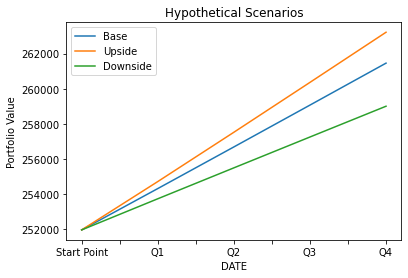

In [173]:
portfolio_value.plot()
plt.title('Hypothetical Scenarios')
plt.xlabel('DATE')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()